2019-01-29 11:50:18,548 DEBUG: backend module://ipykernel.pylab.backend_inline version unknown
/Users/yukako/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/yukako/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SystemExit: 0

/Users/yukako/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


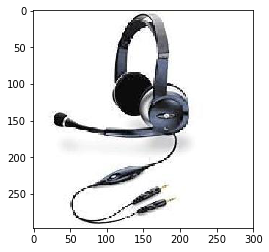

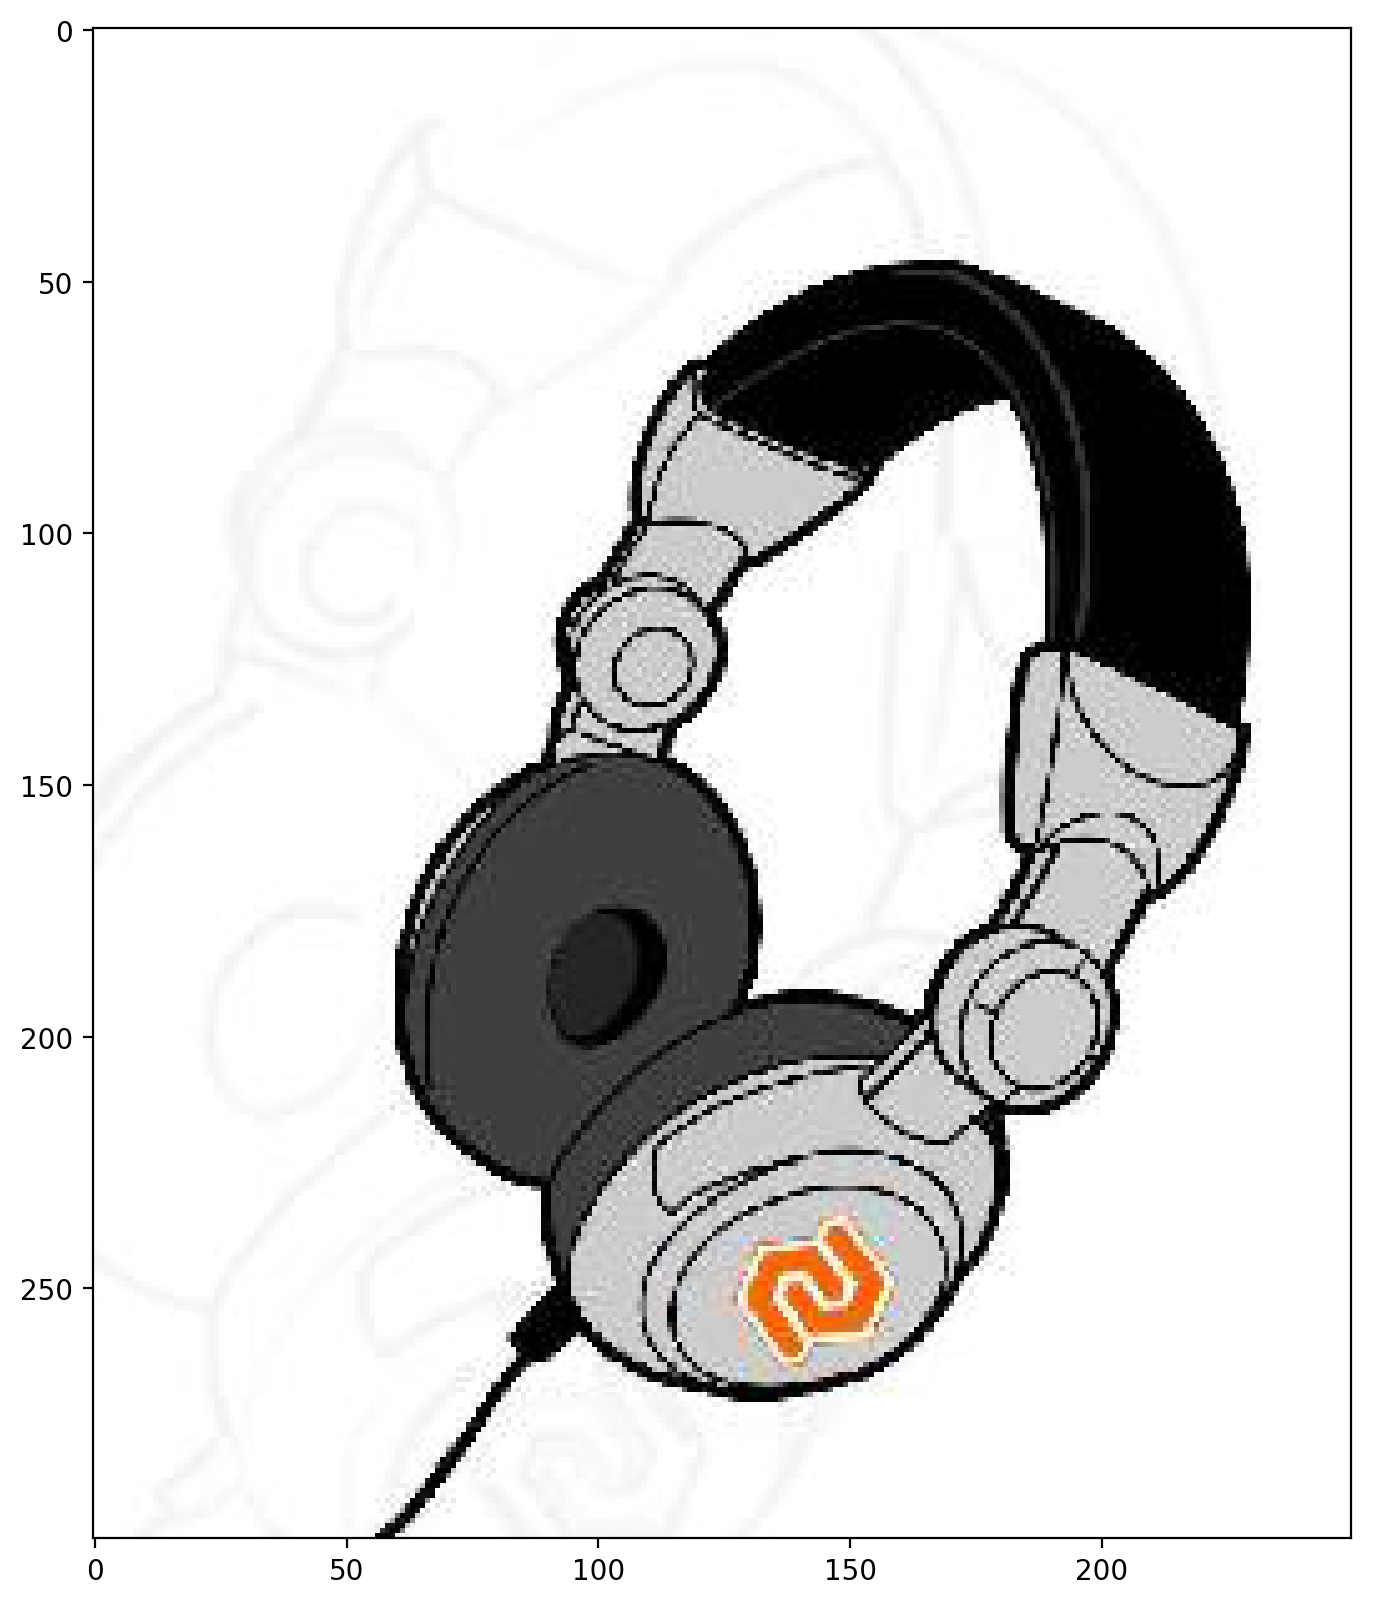

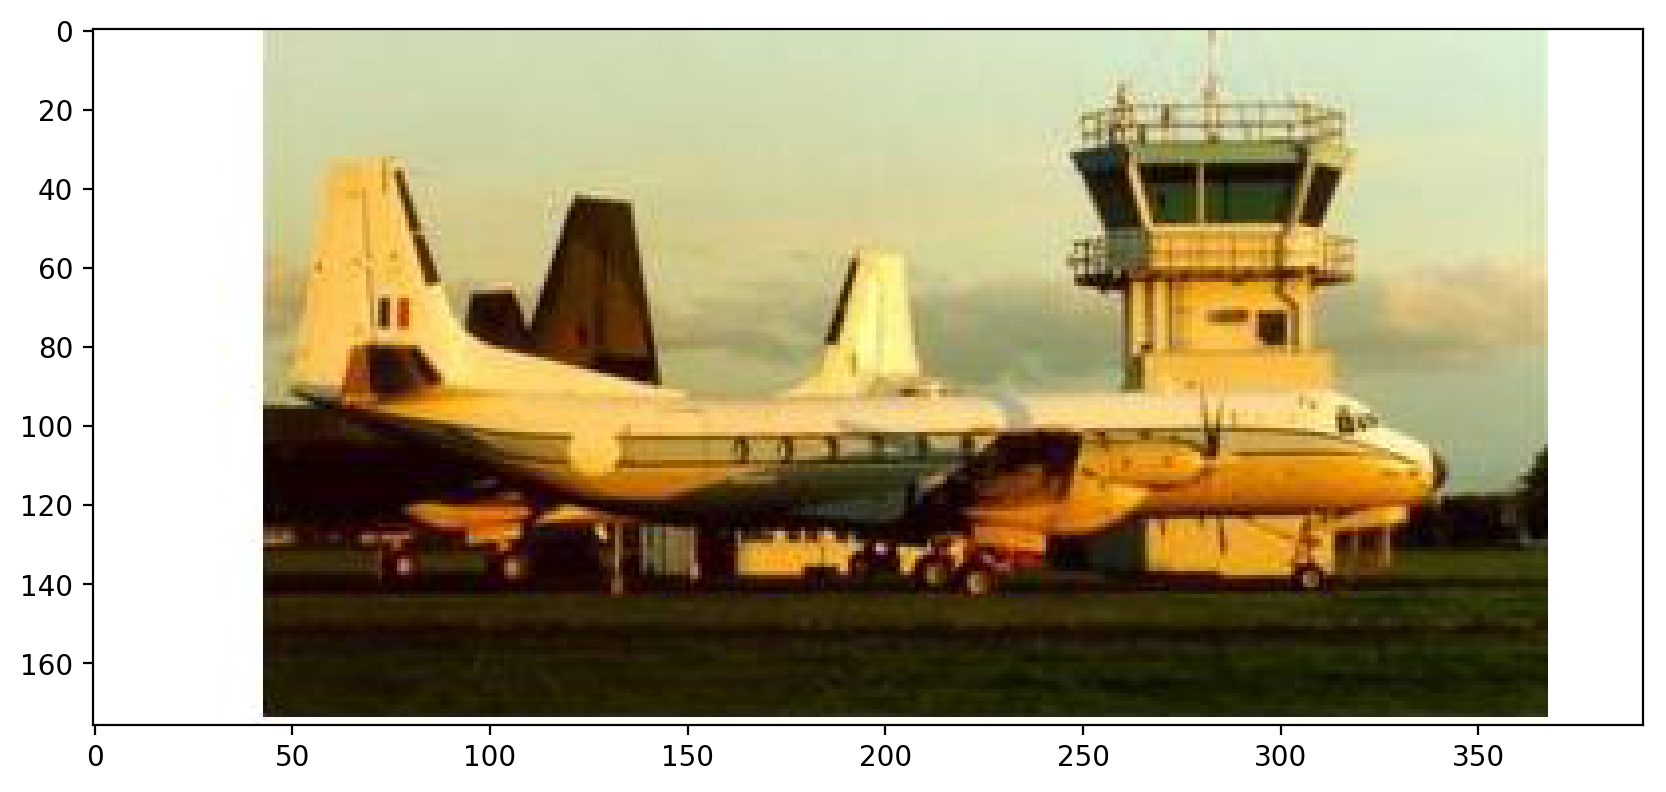

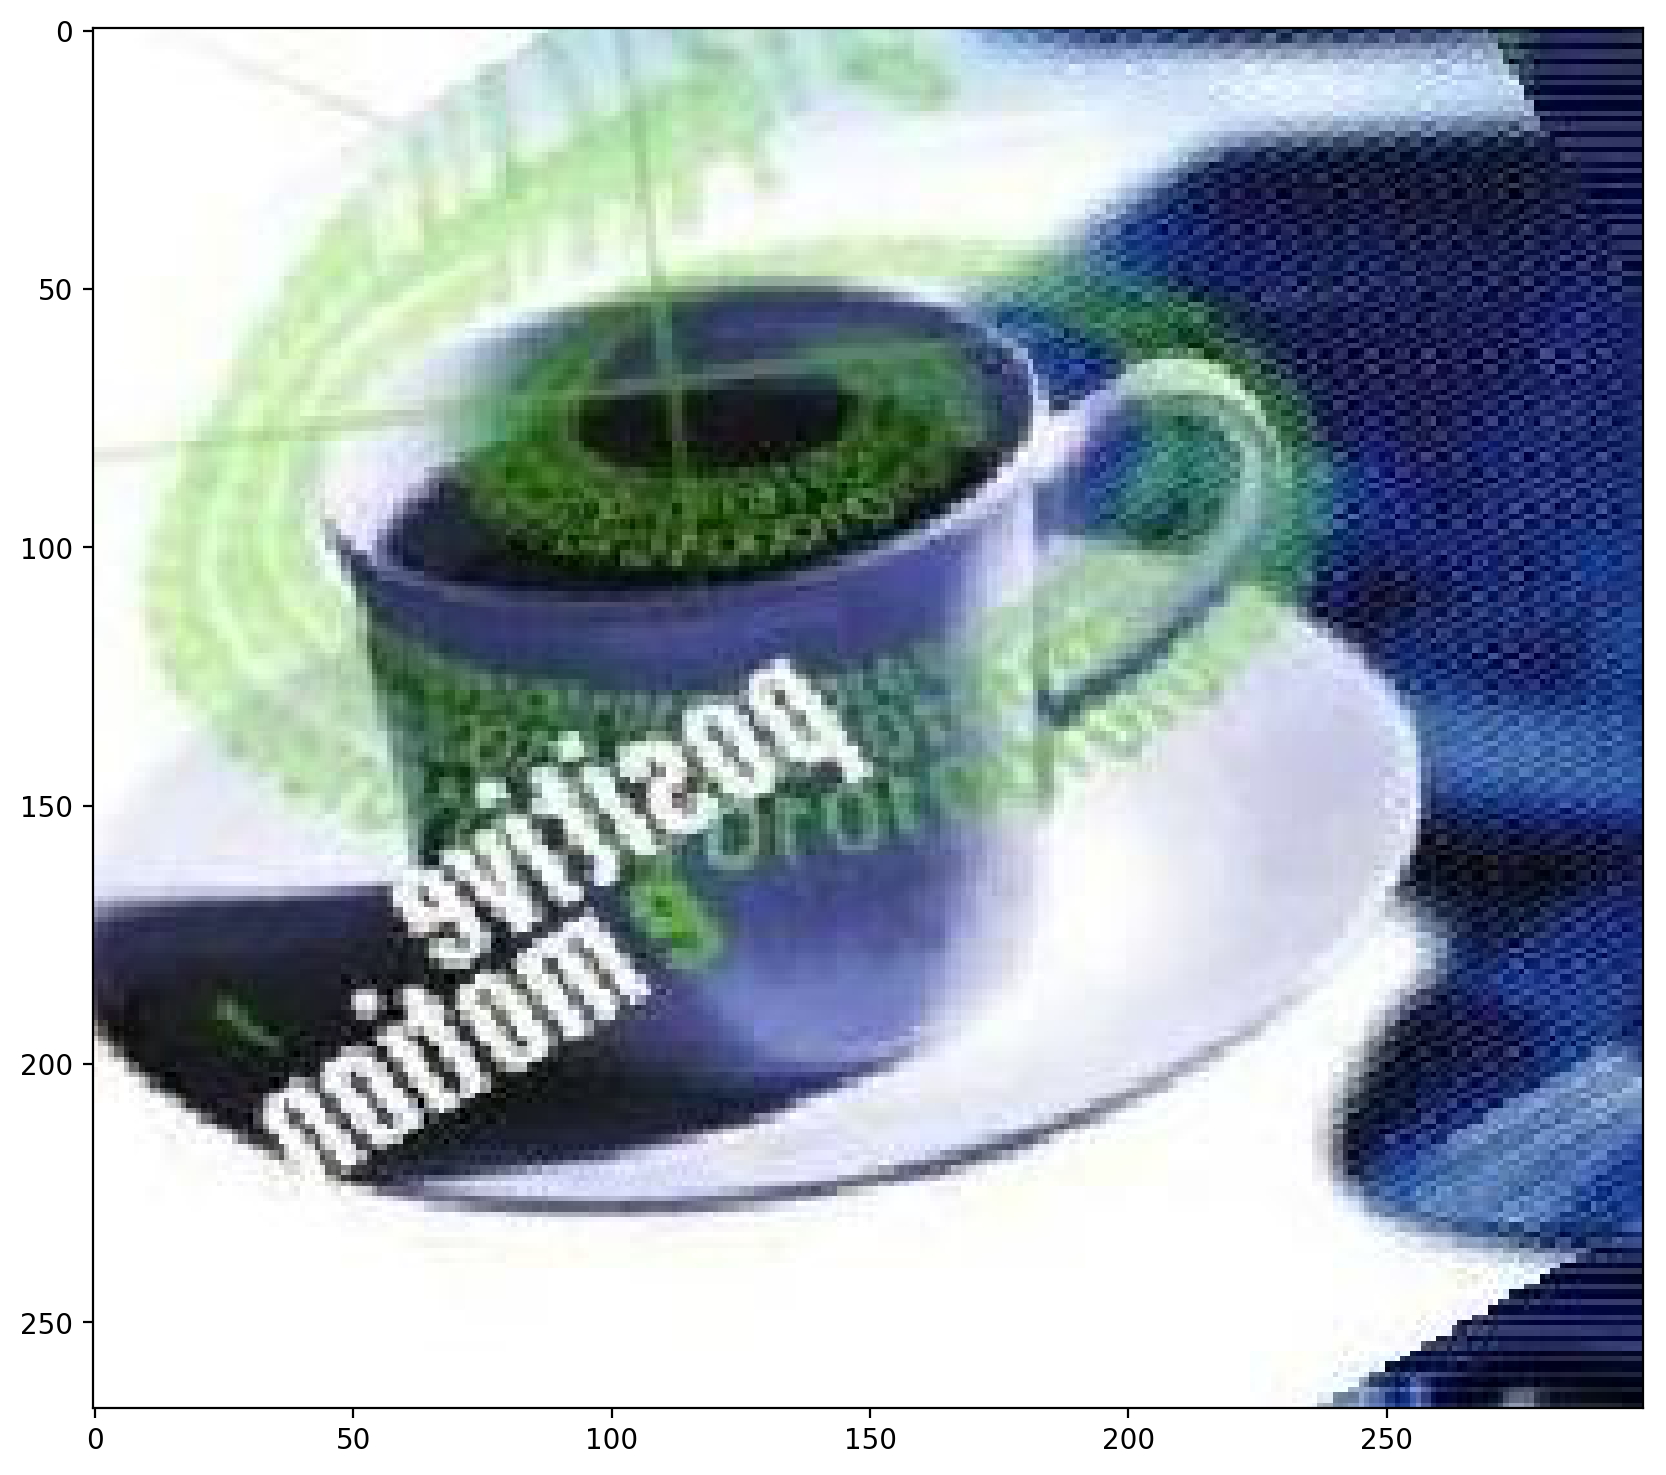

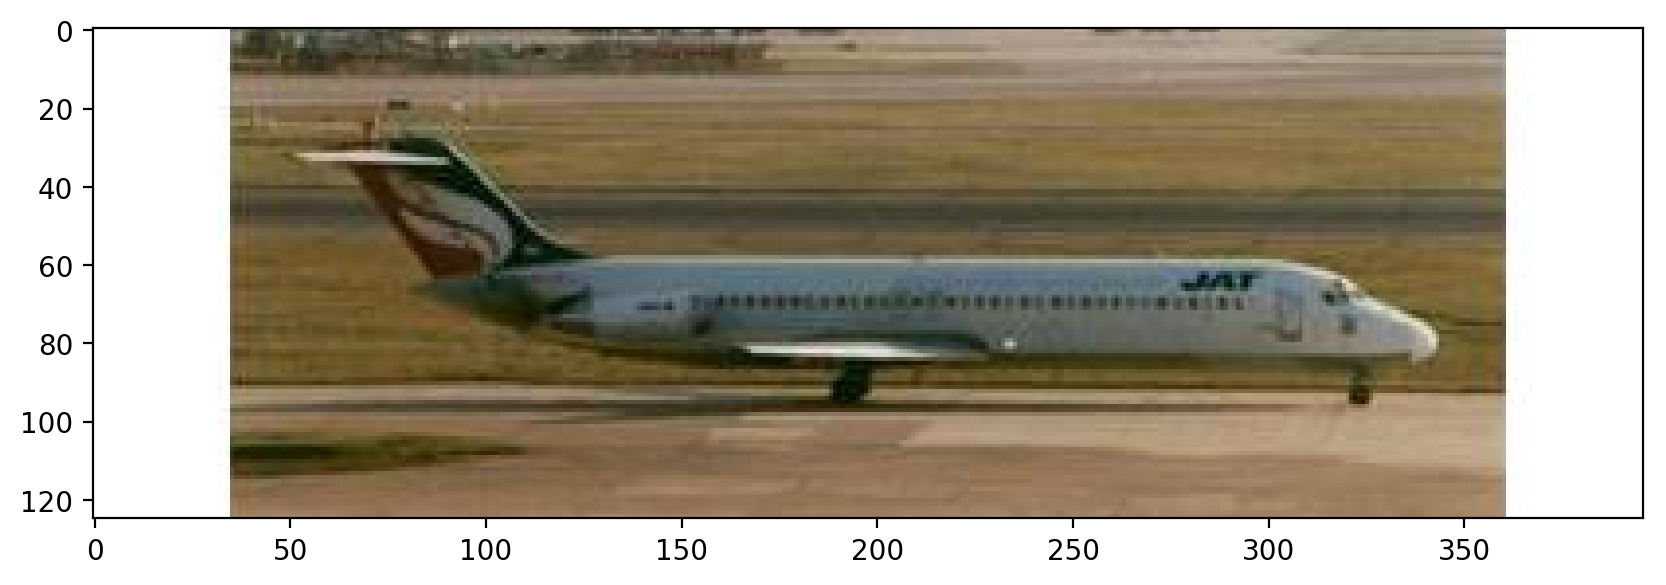

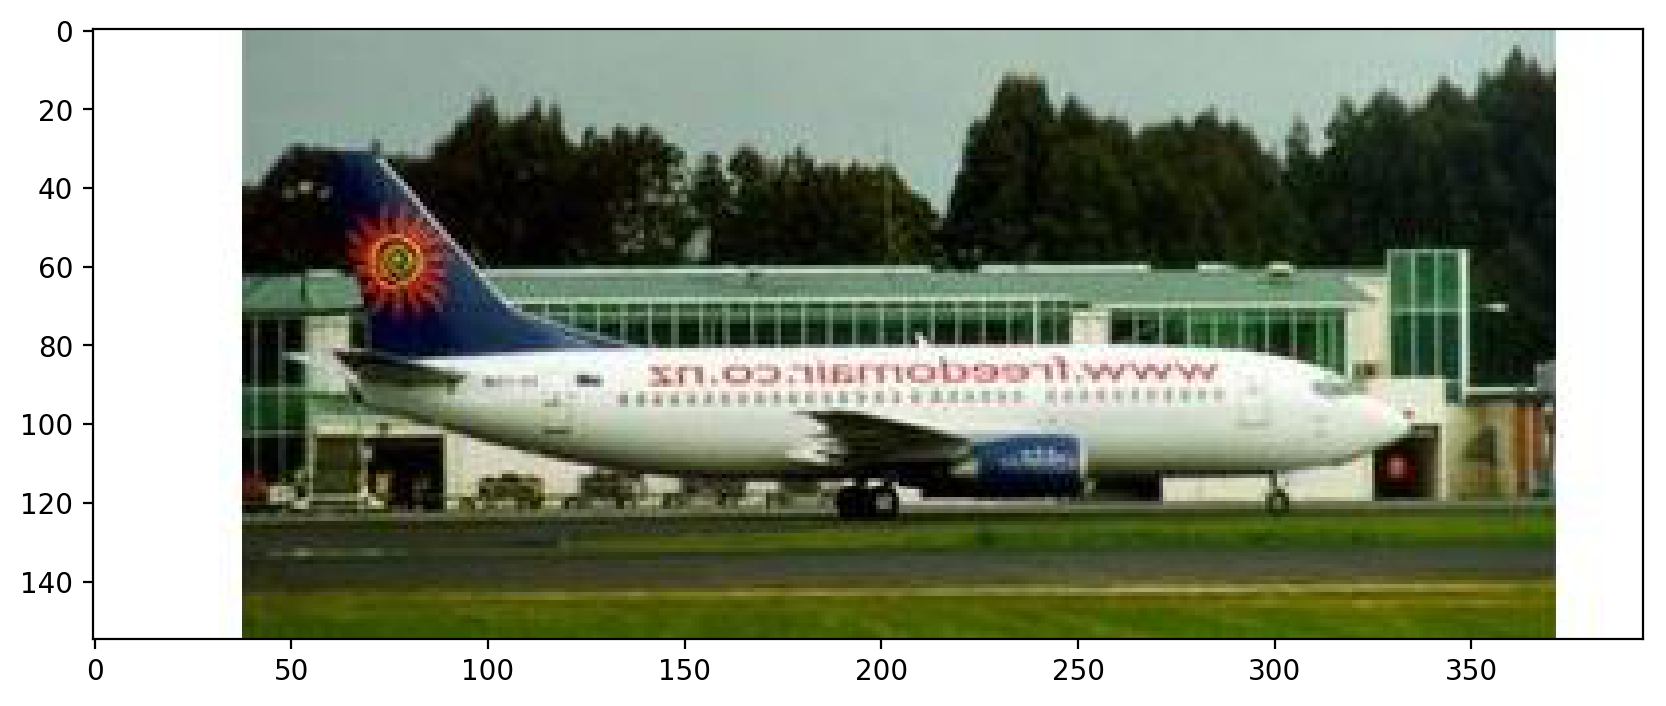

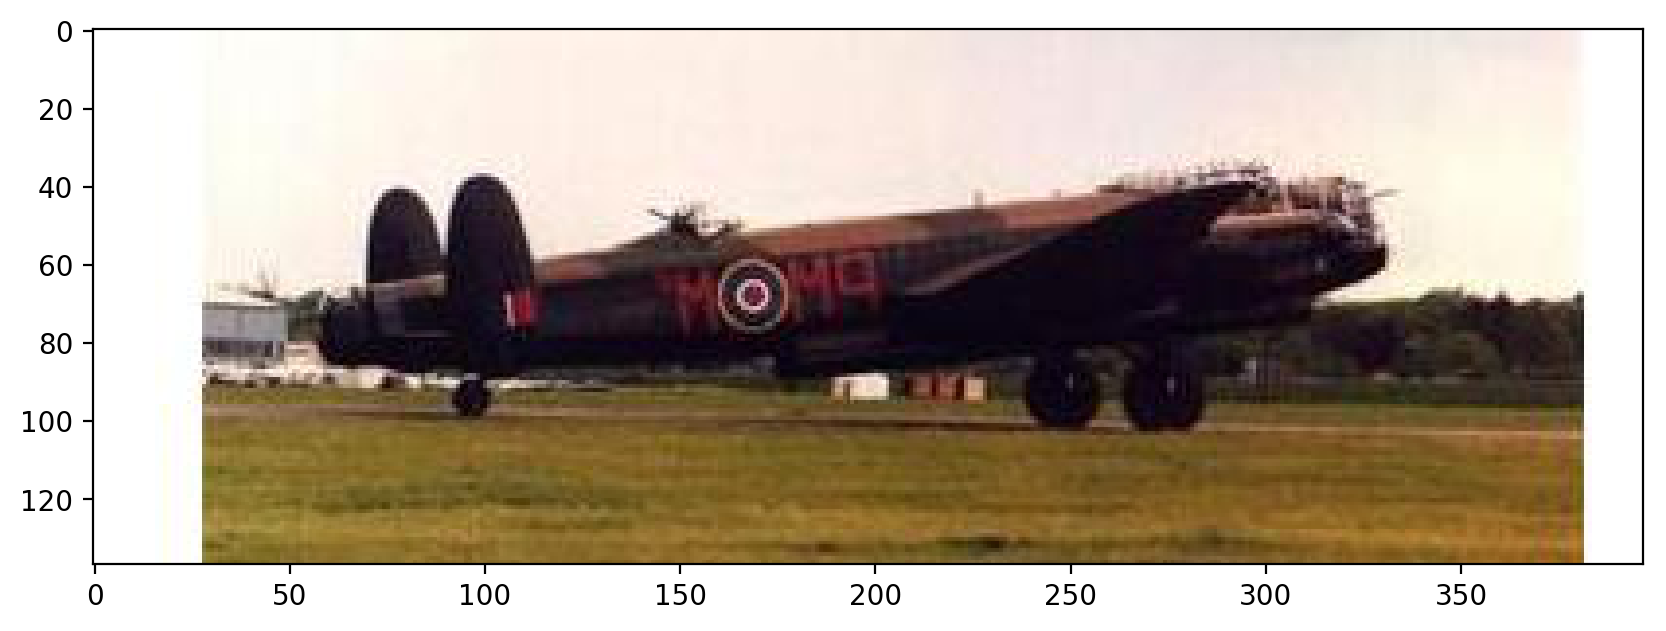

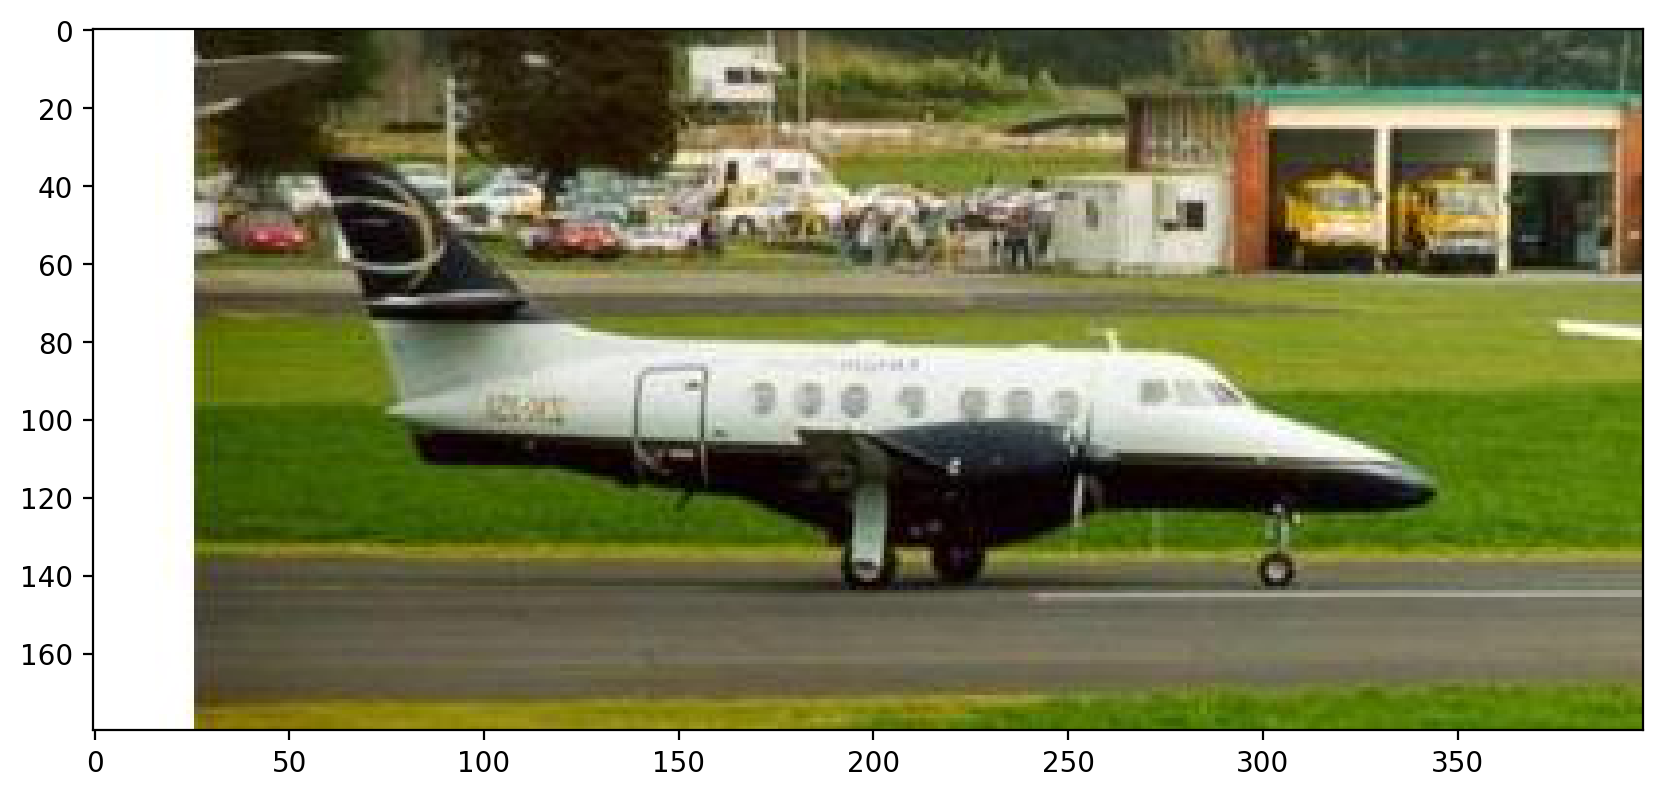

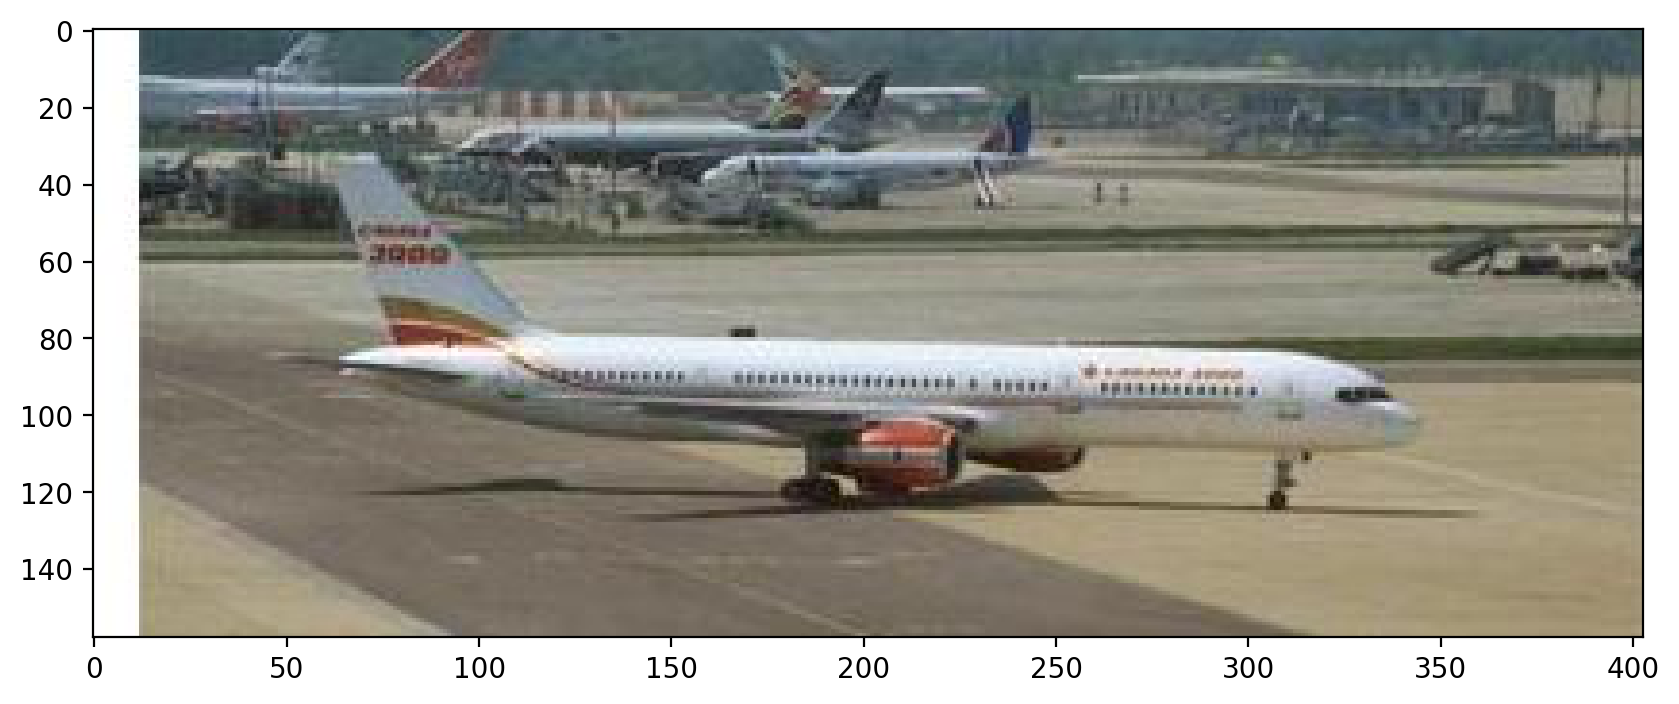

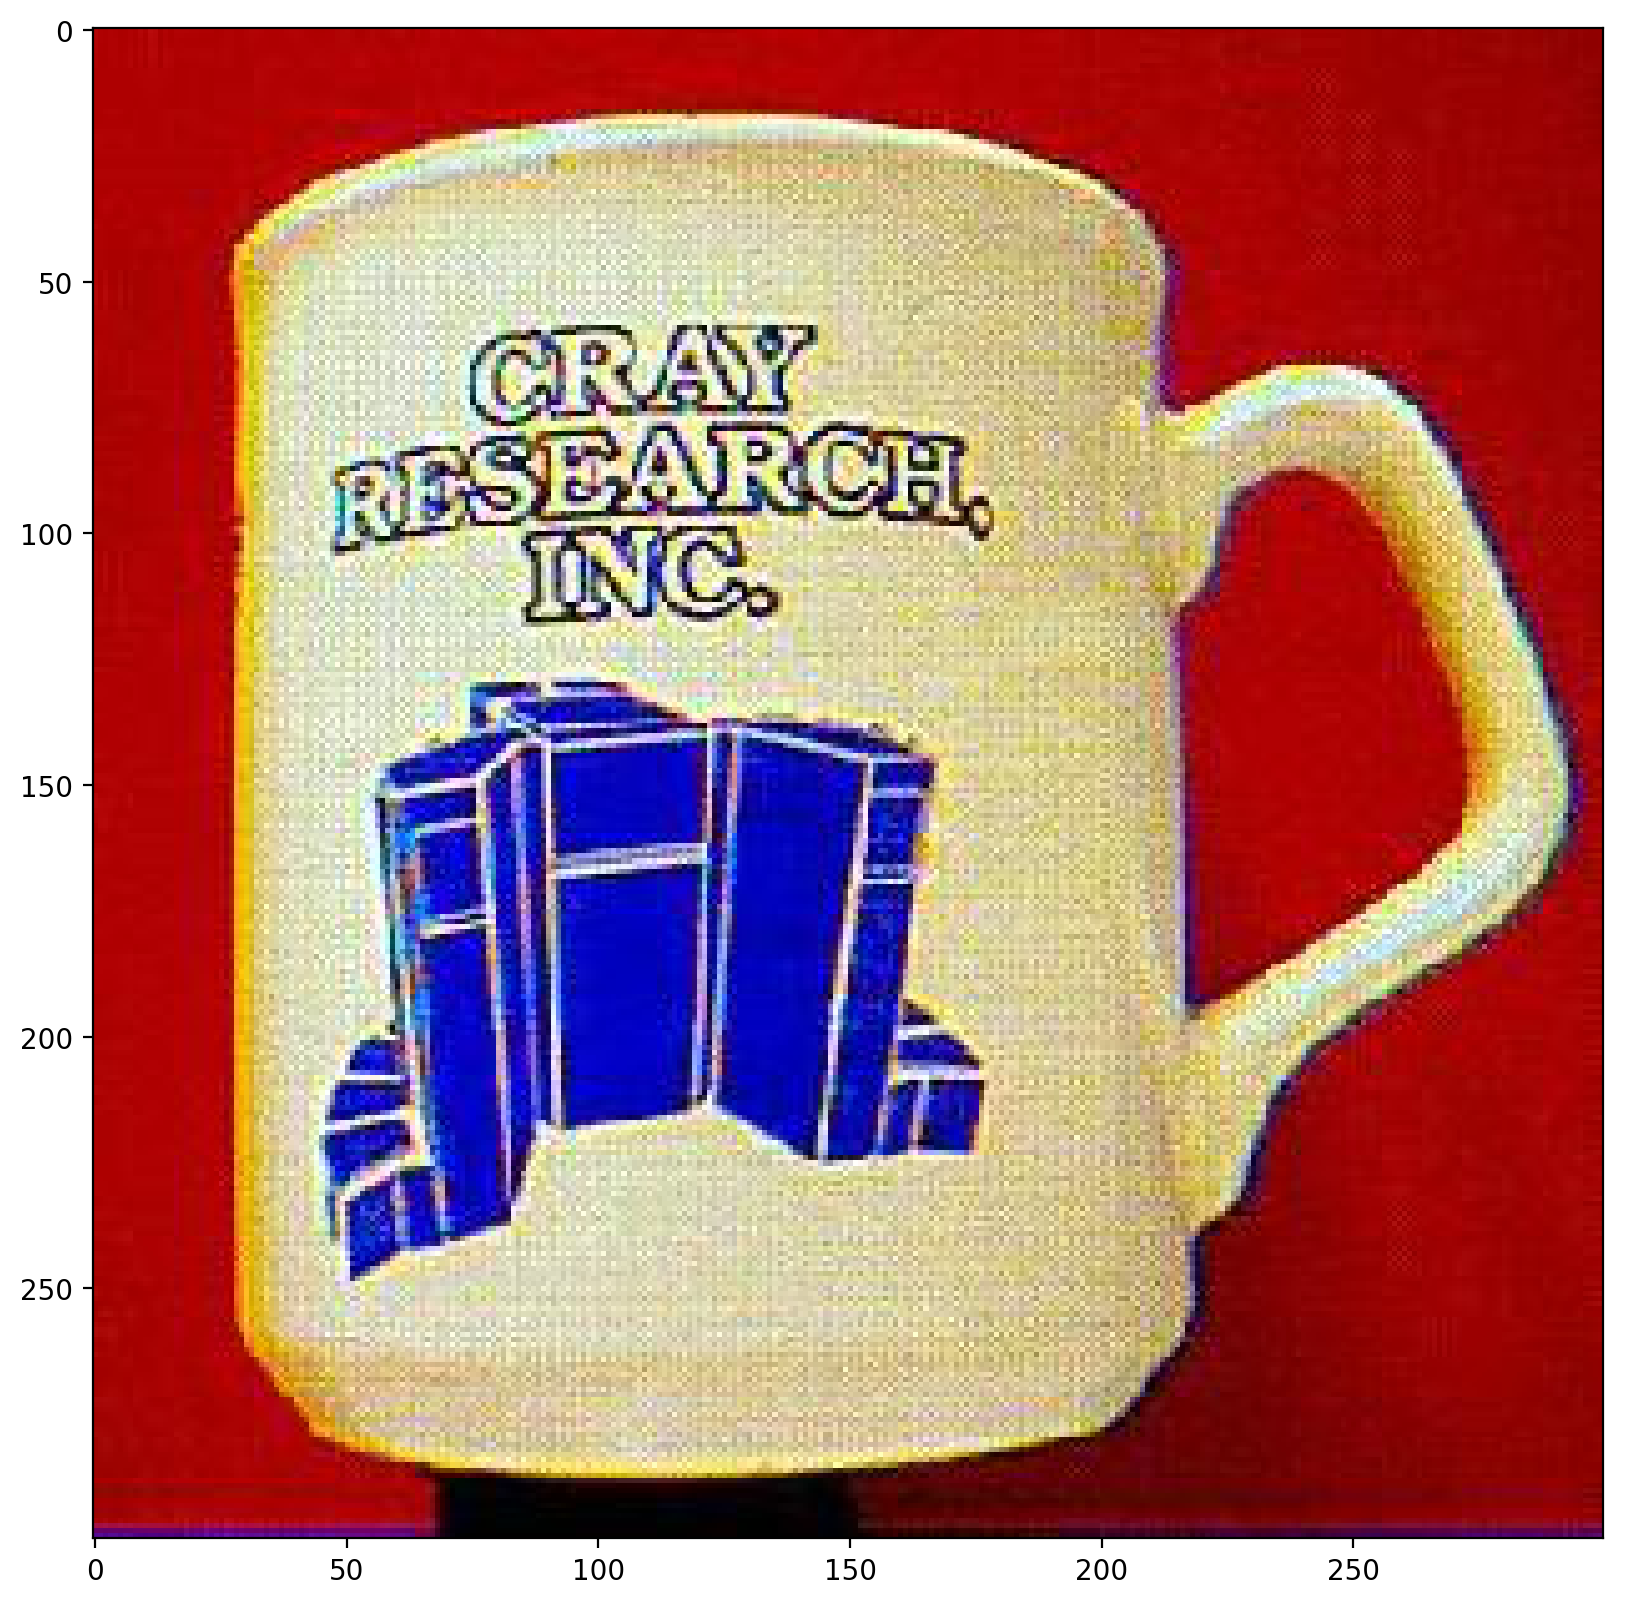

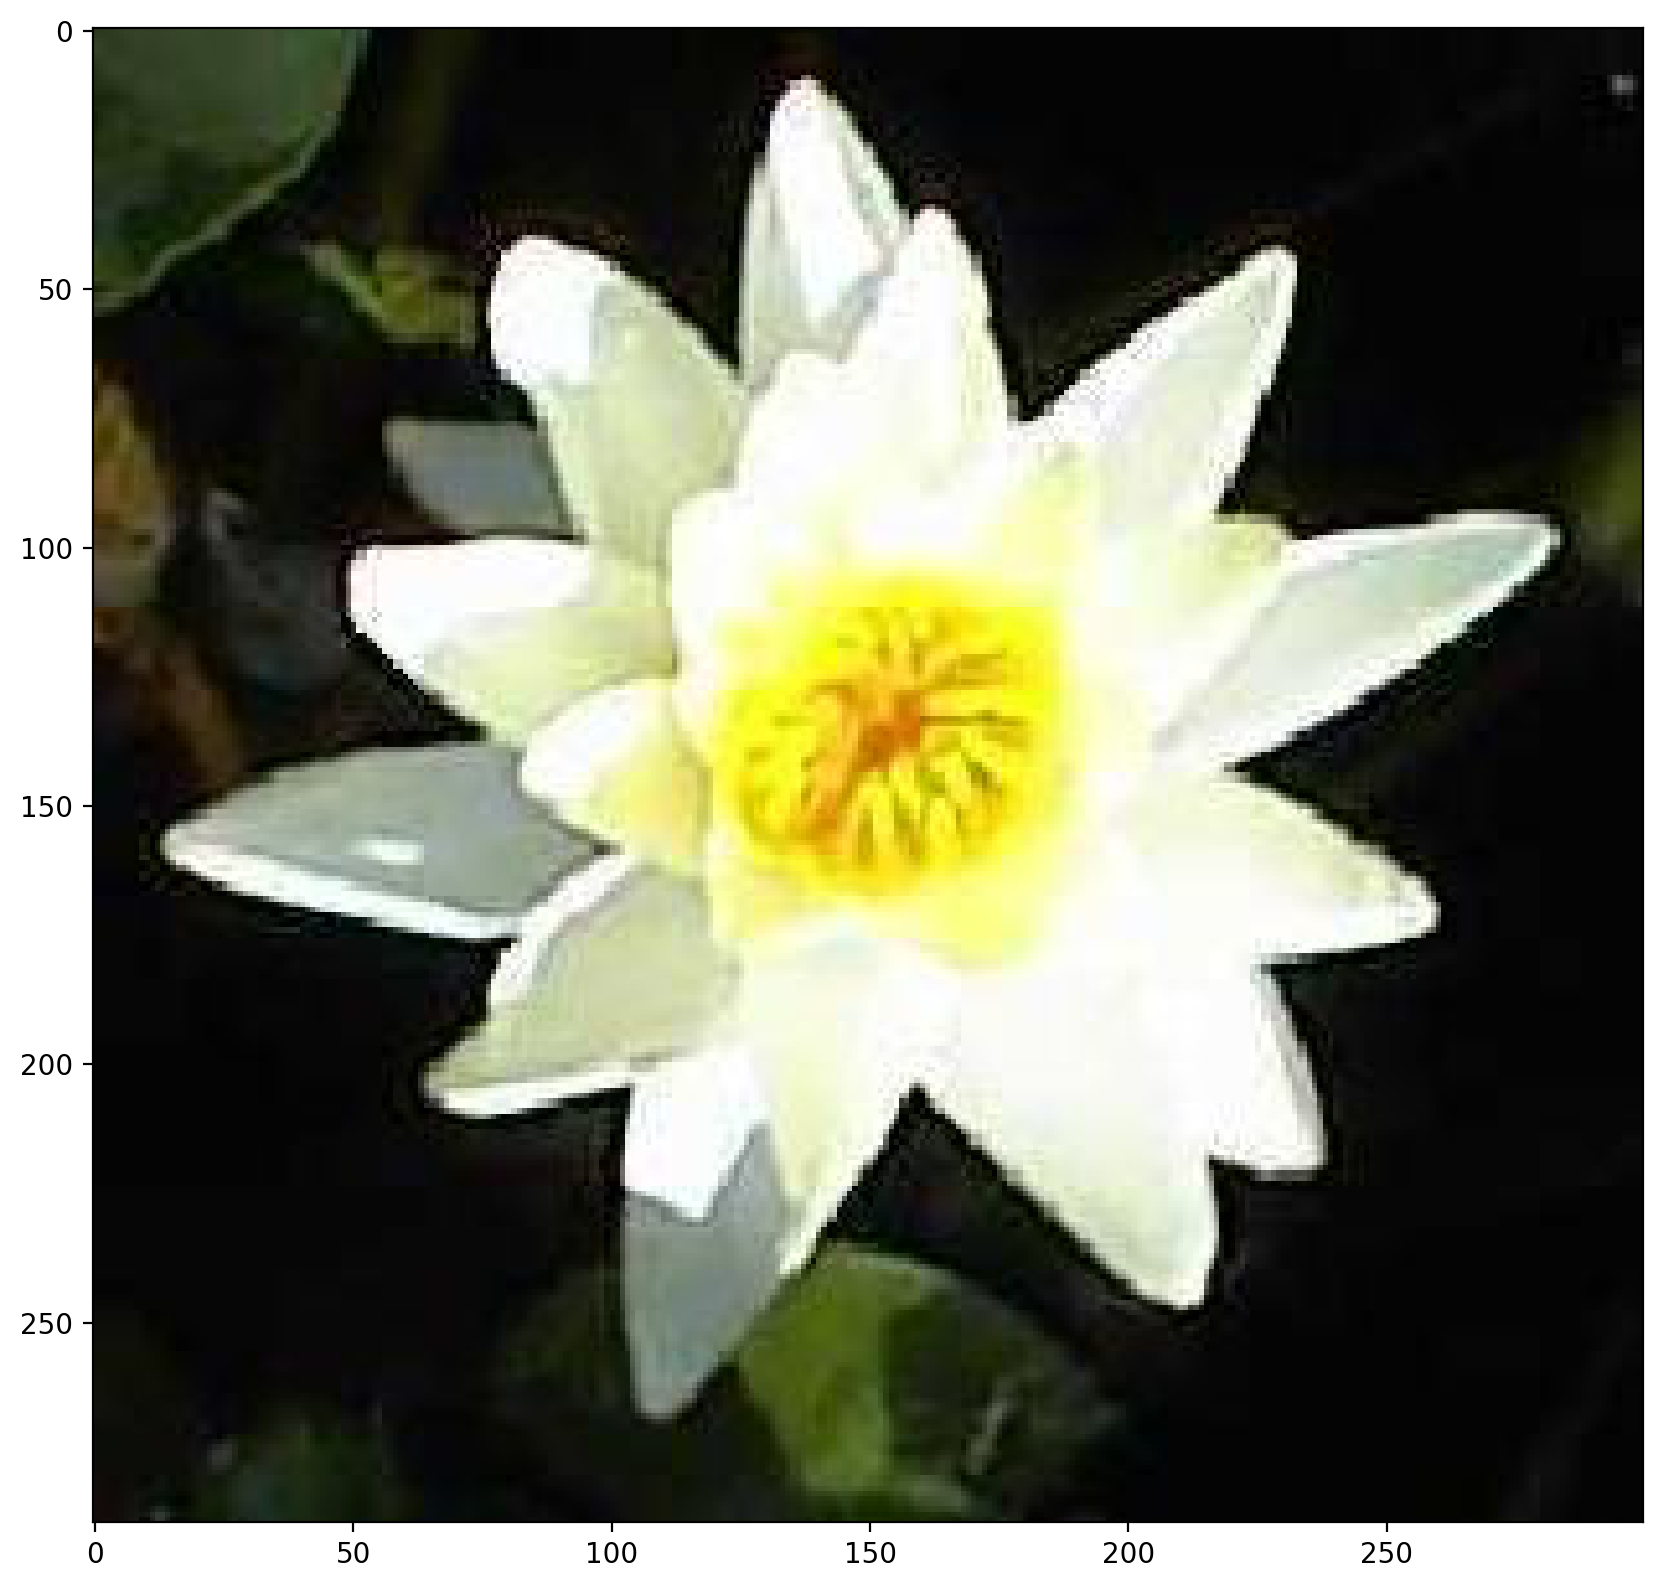

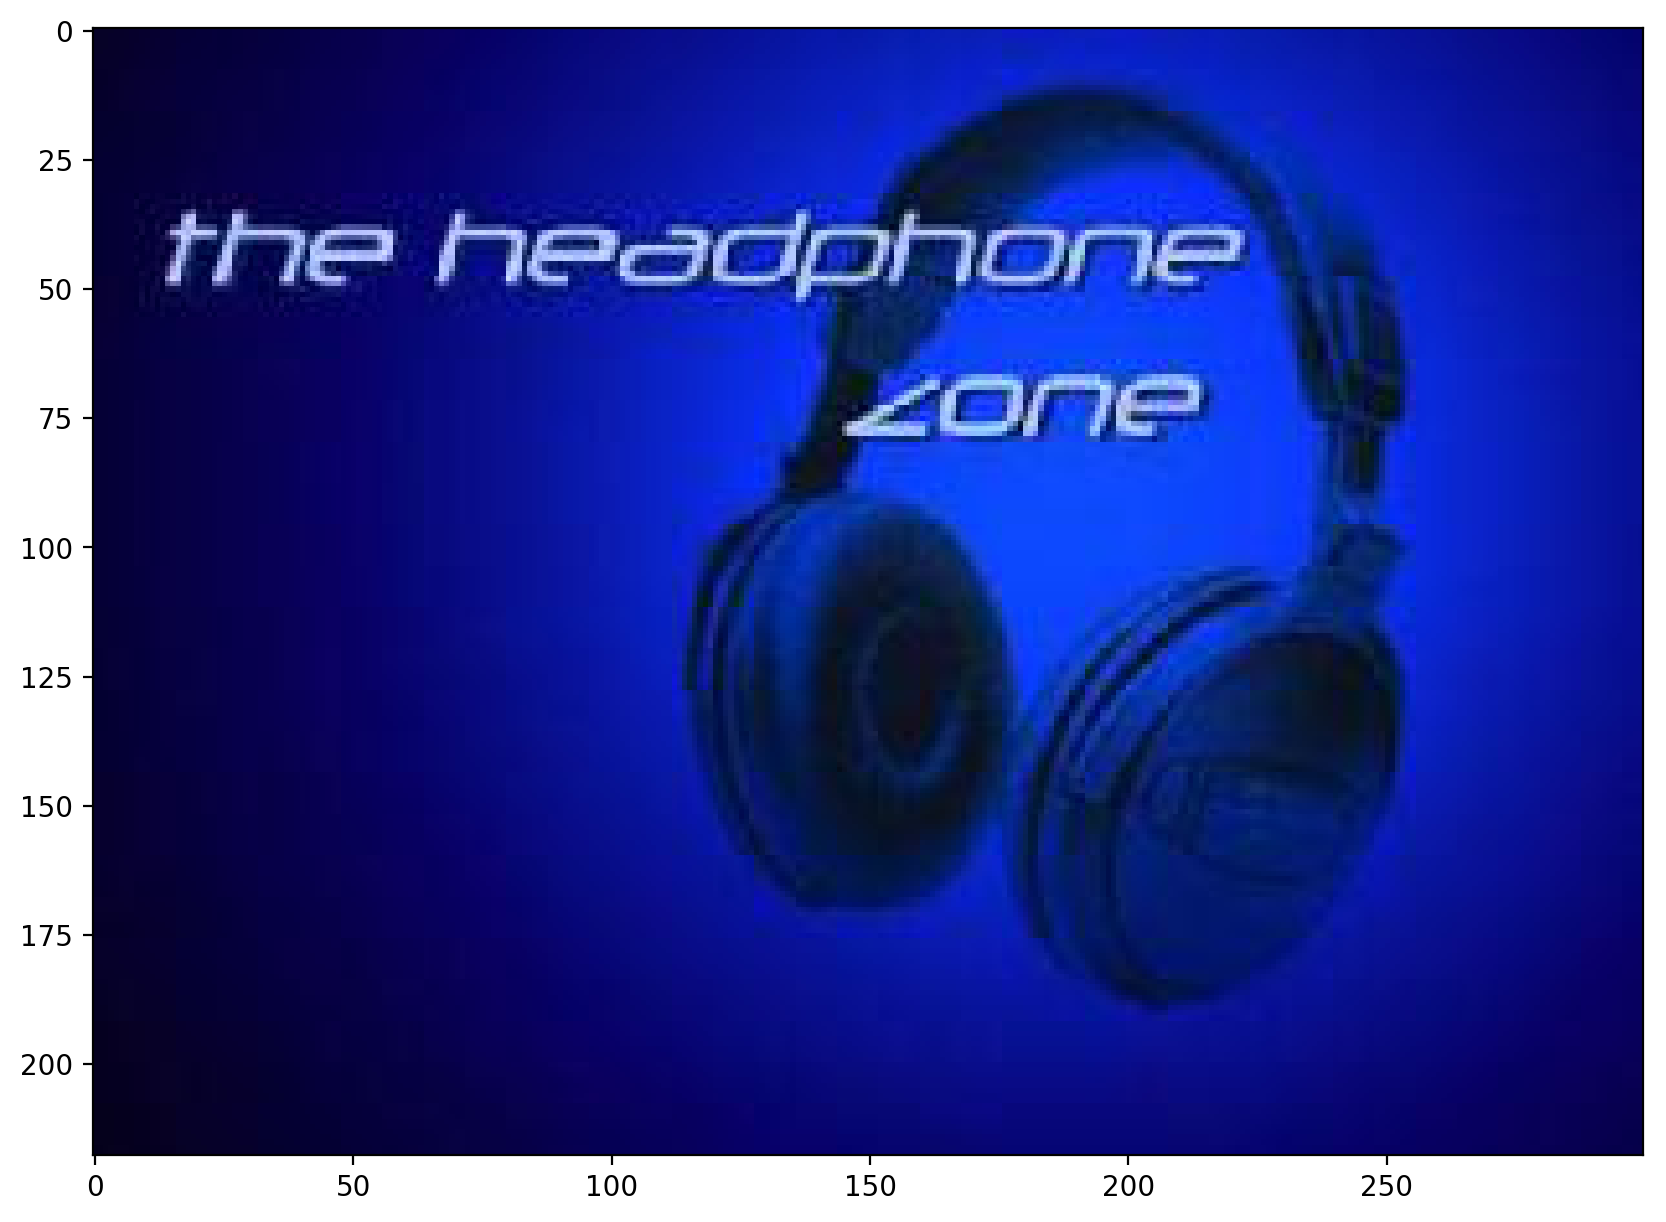

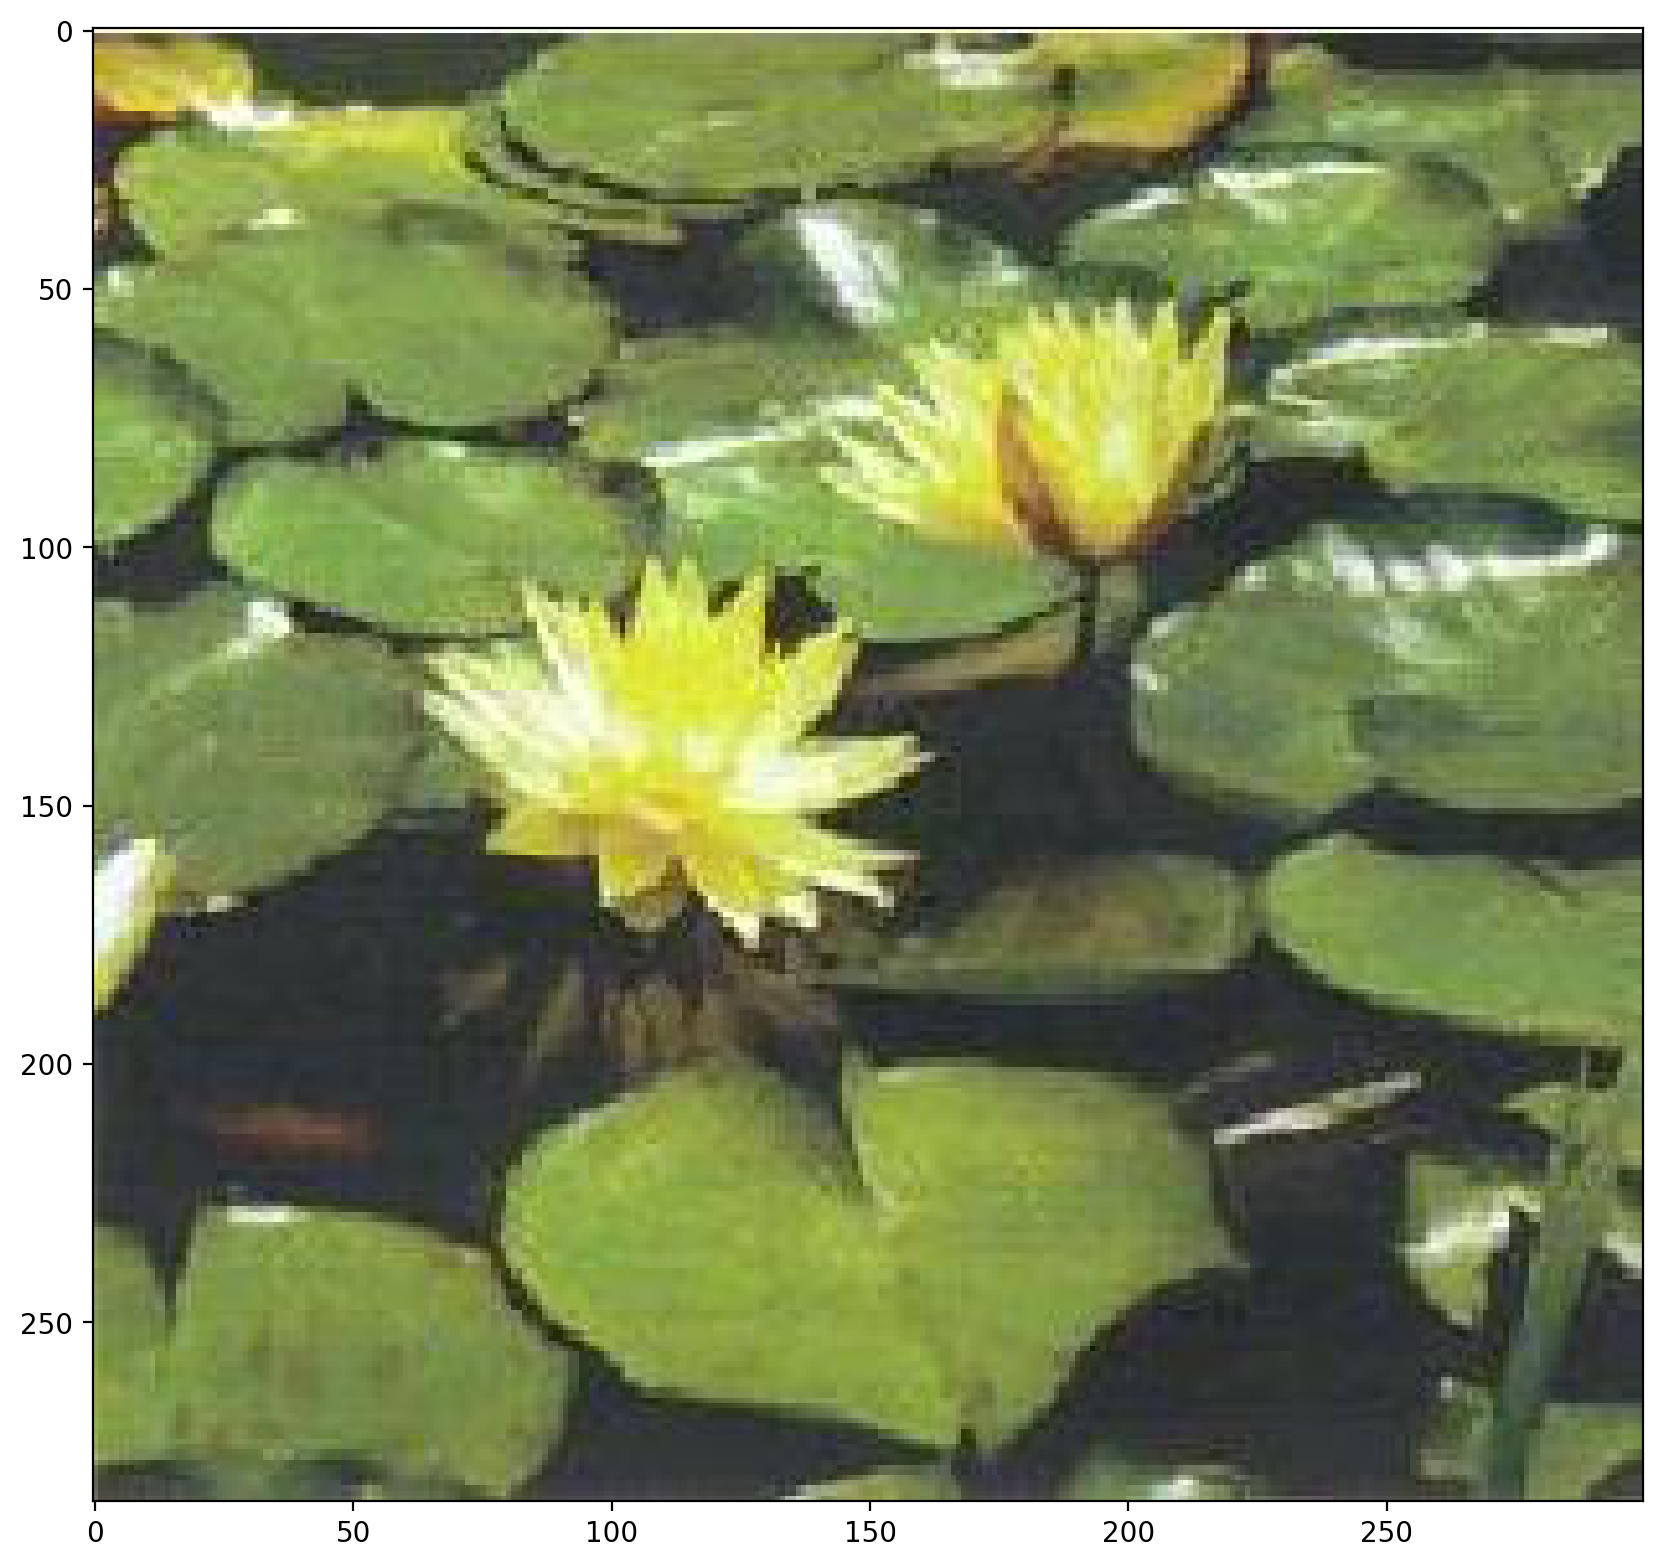

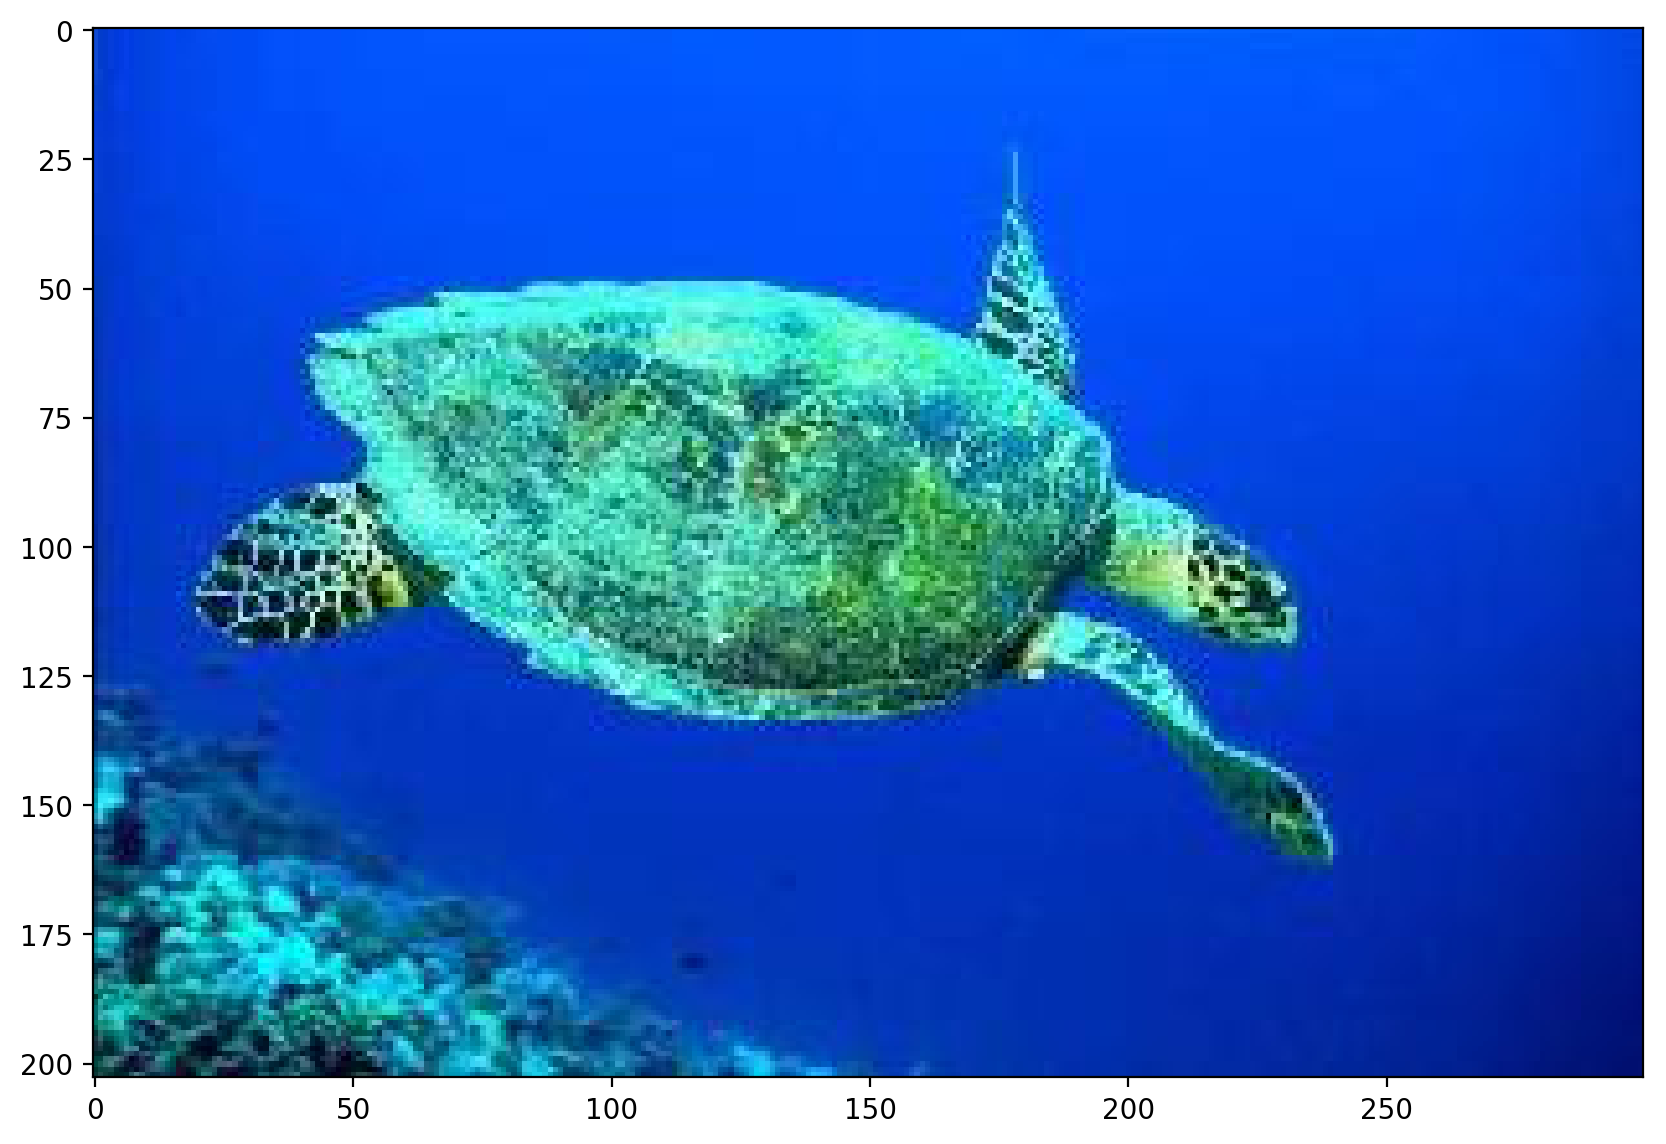

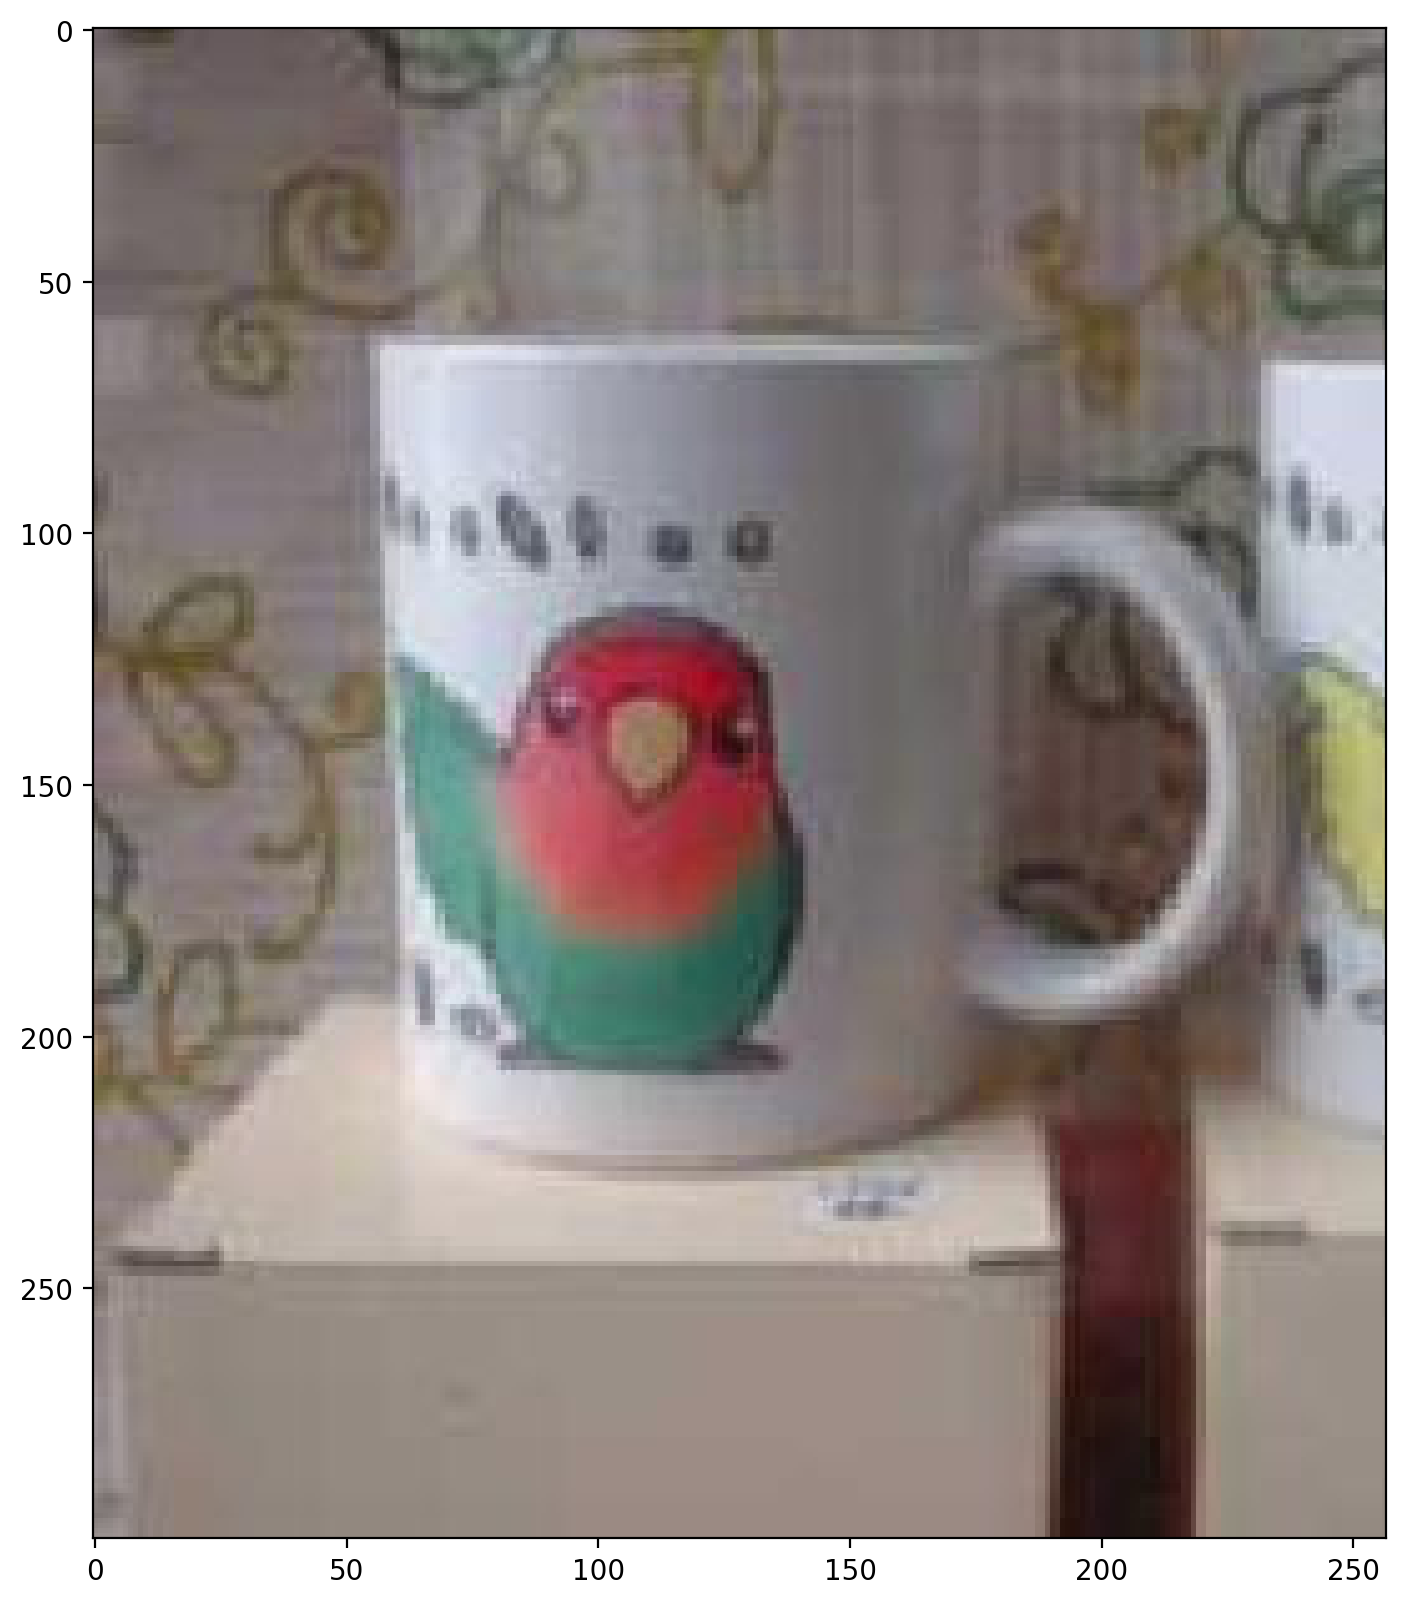

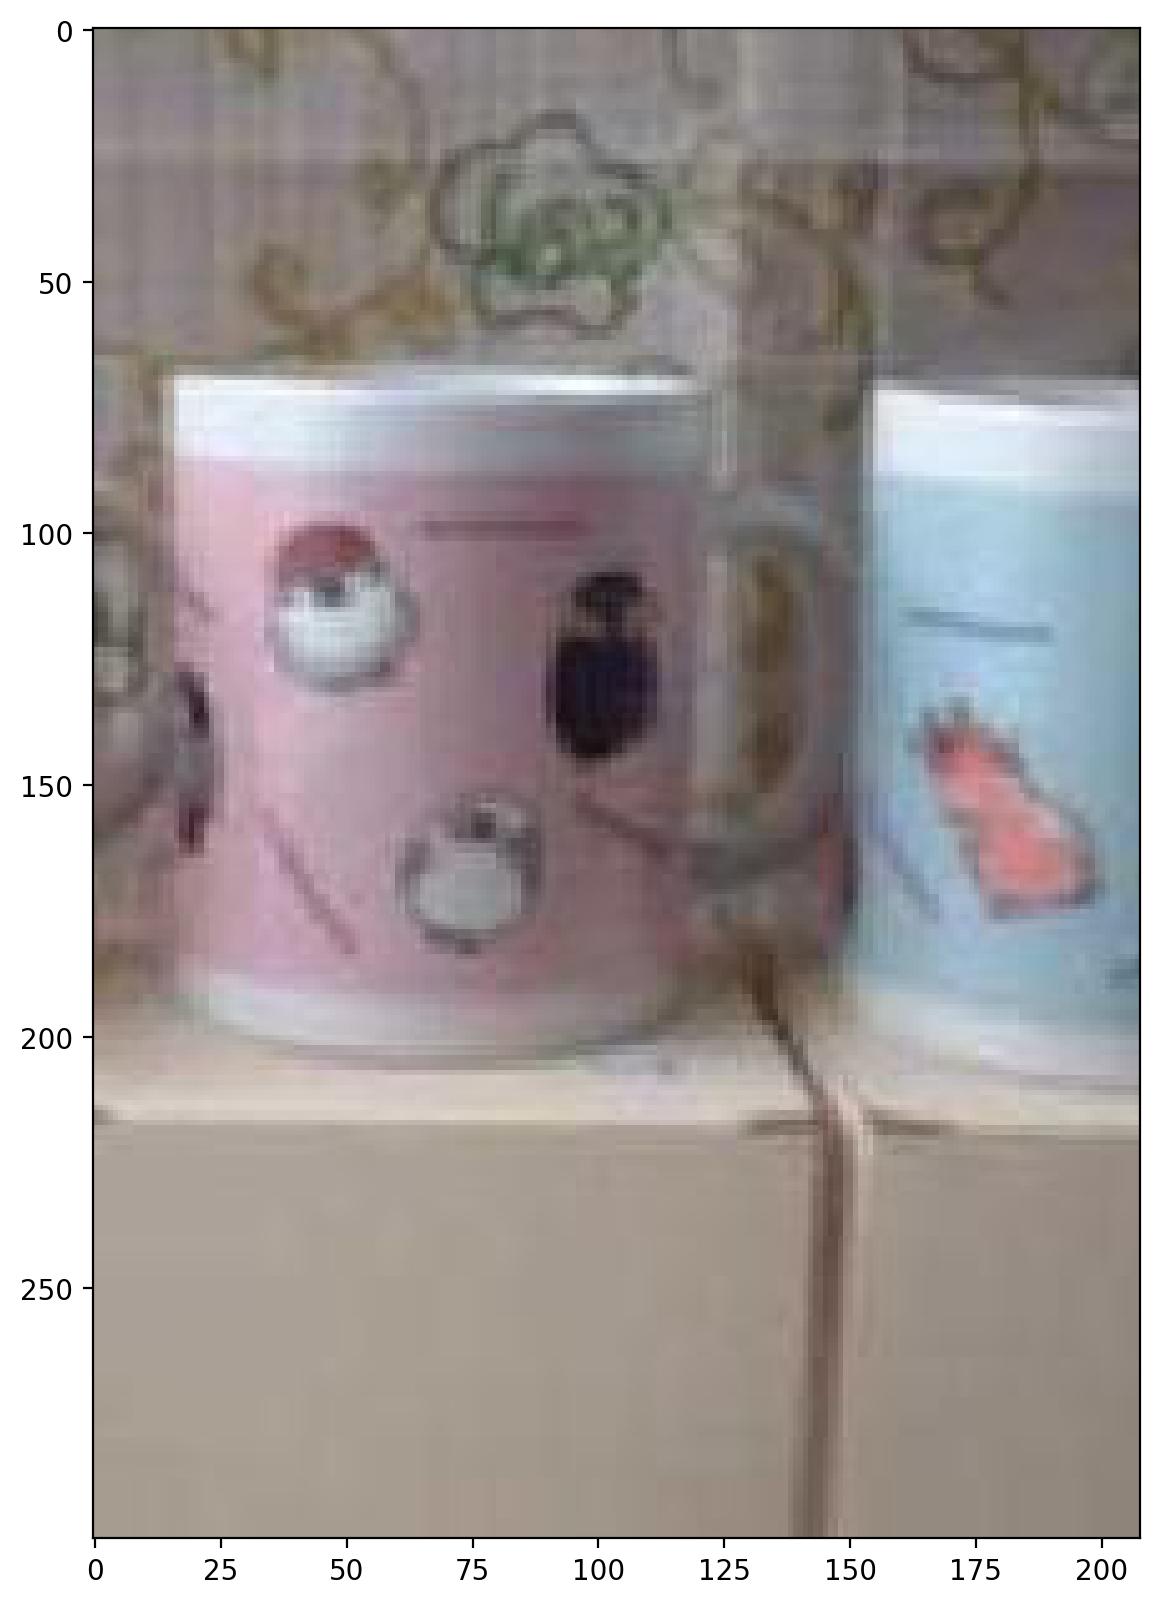

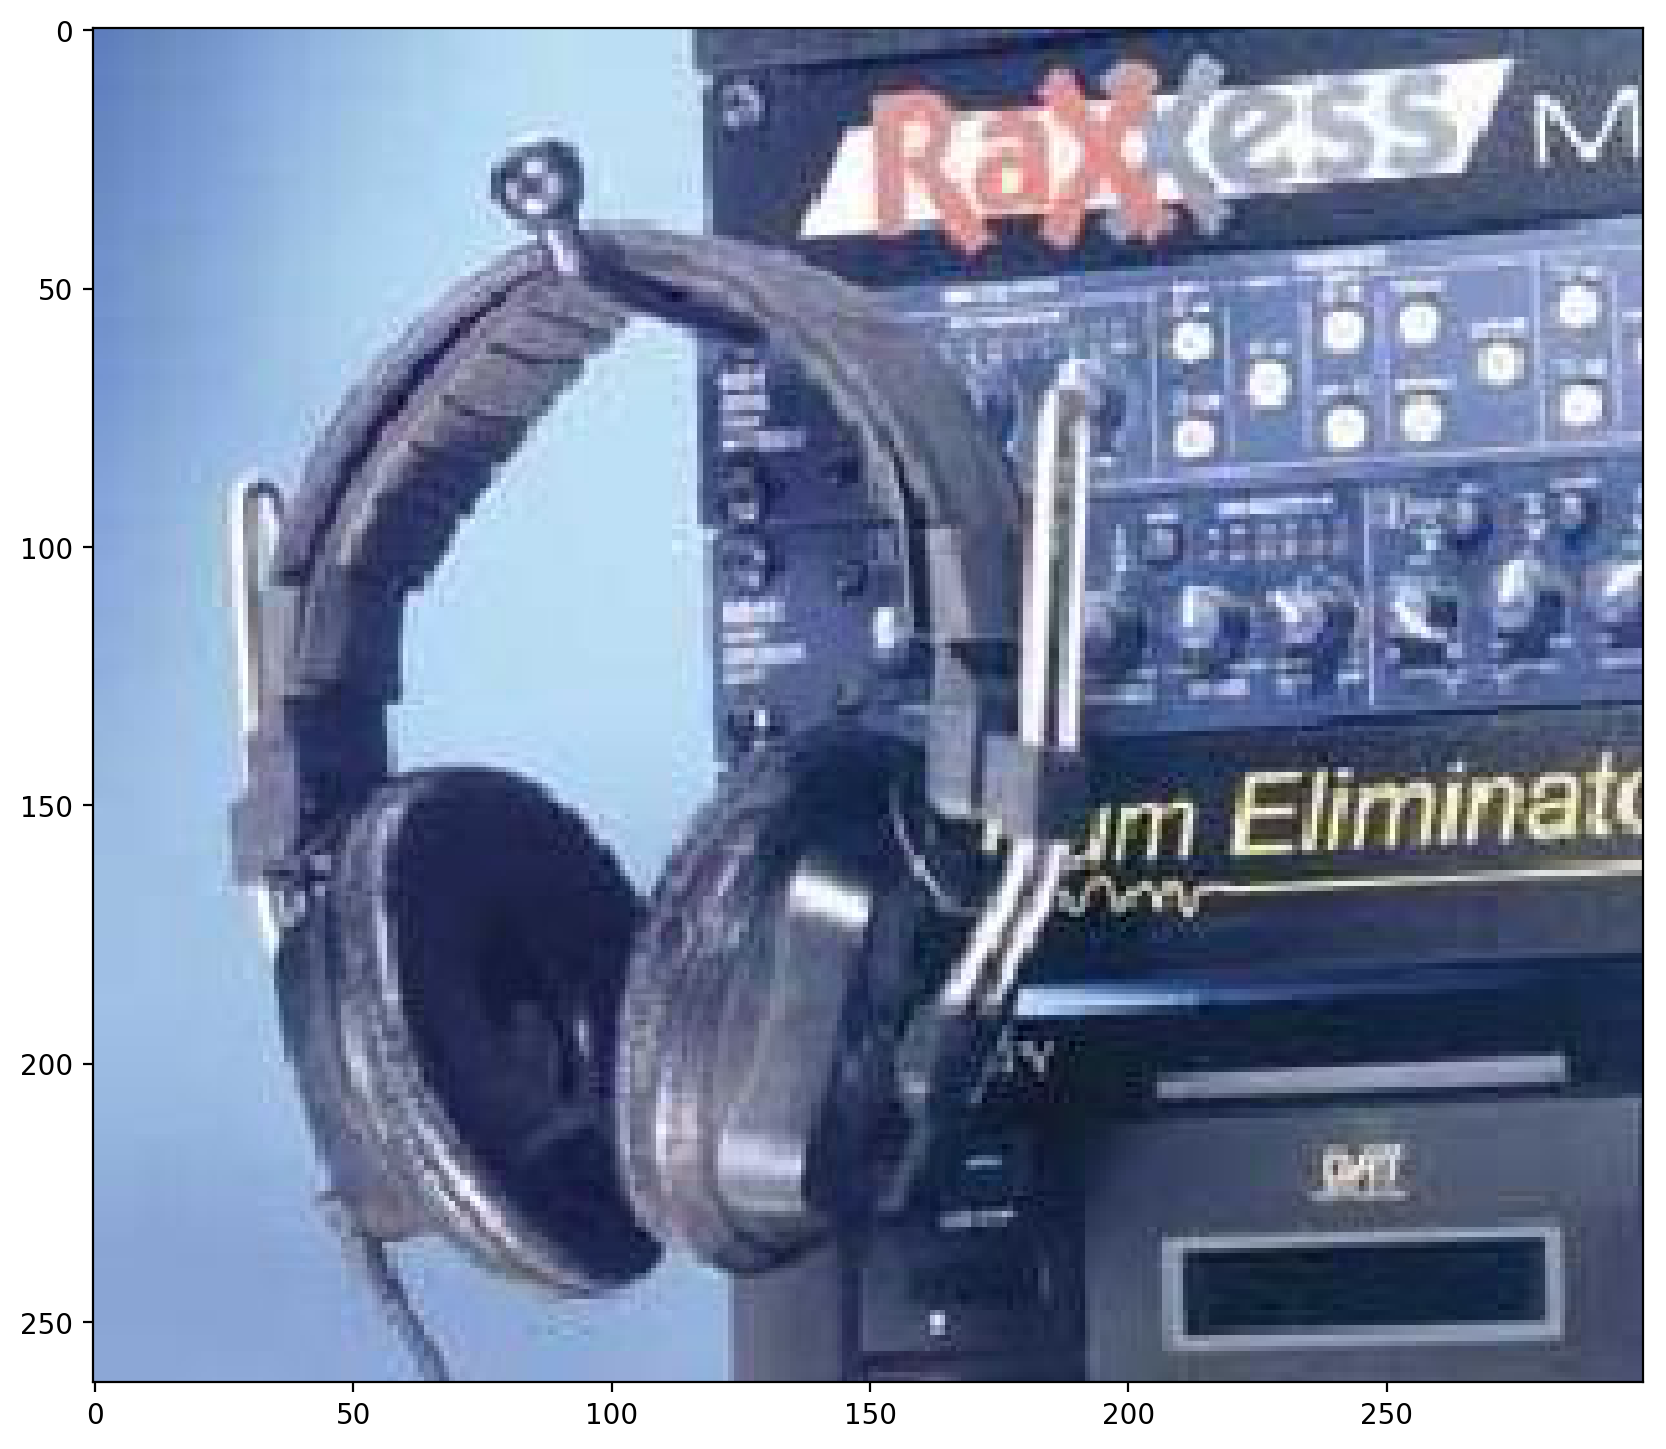

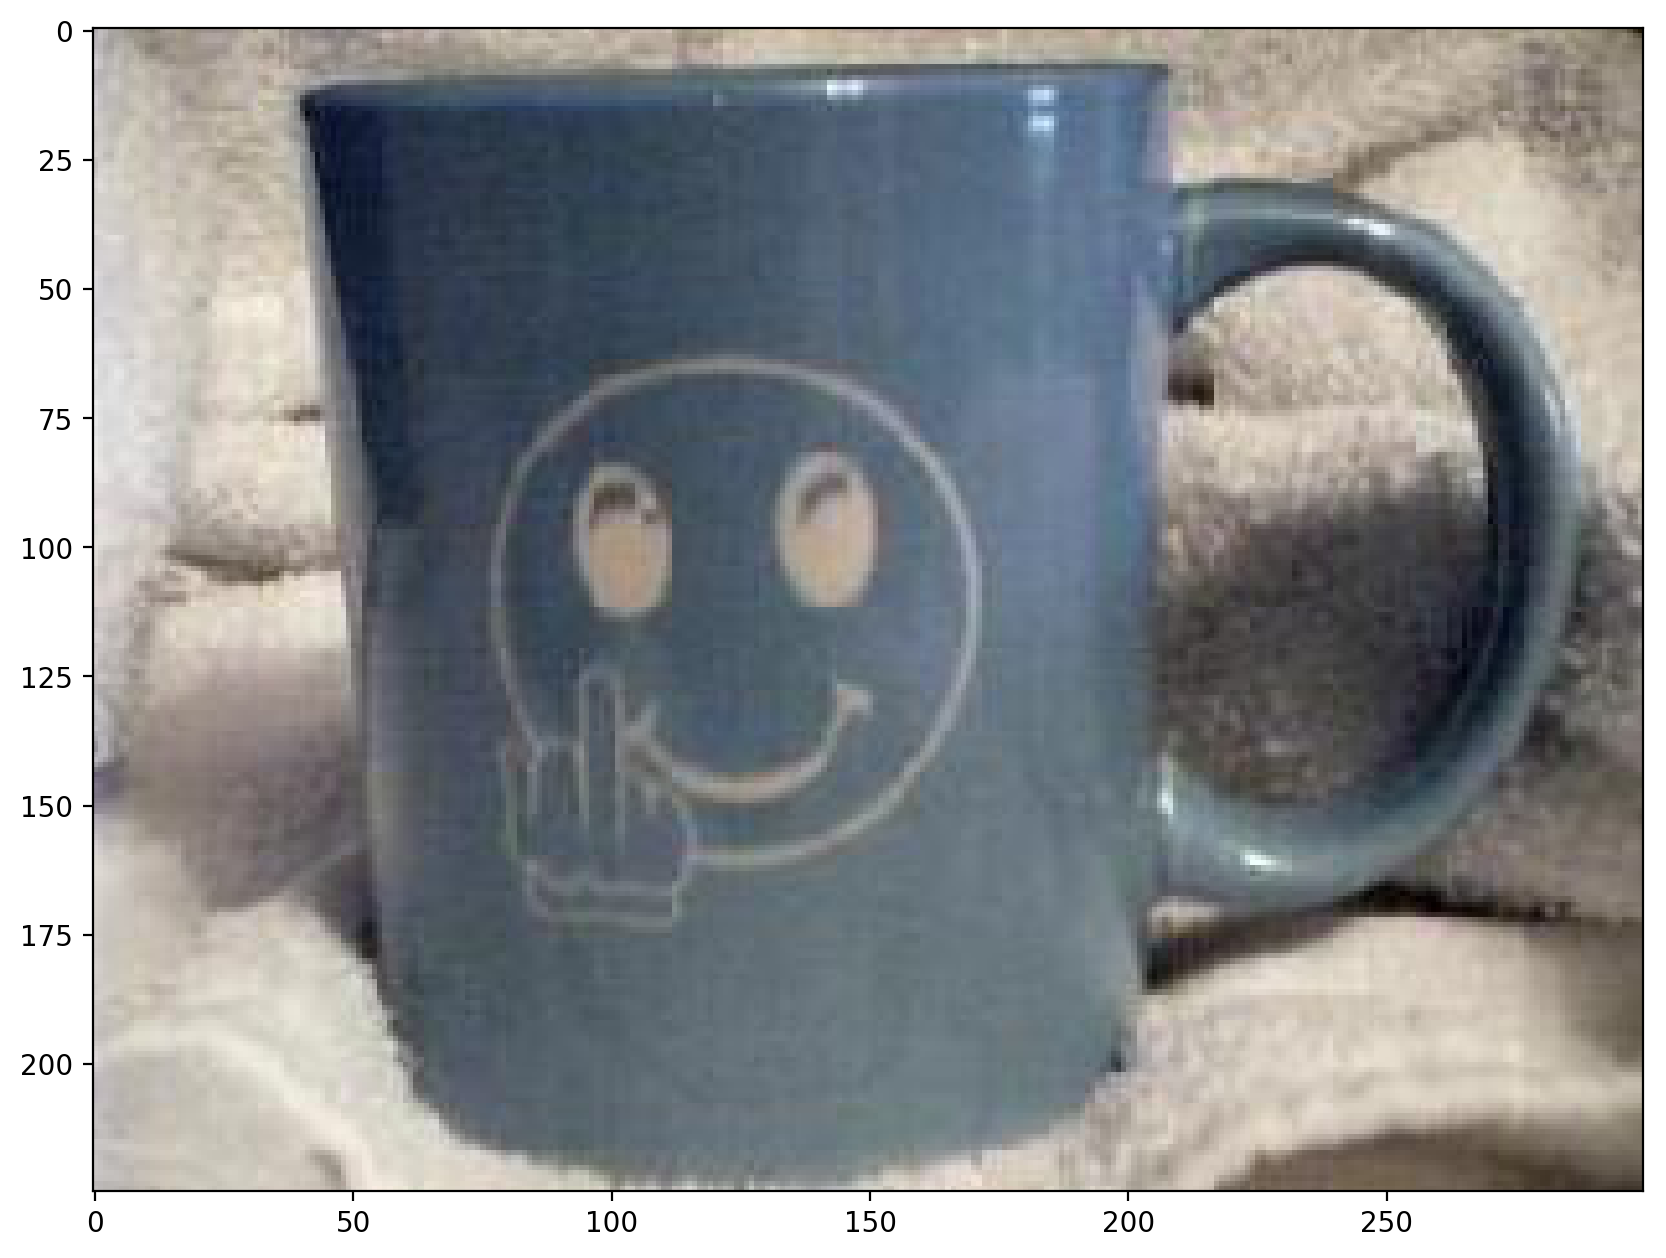

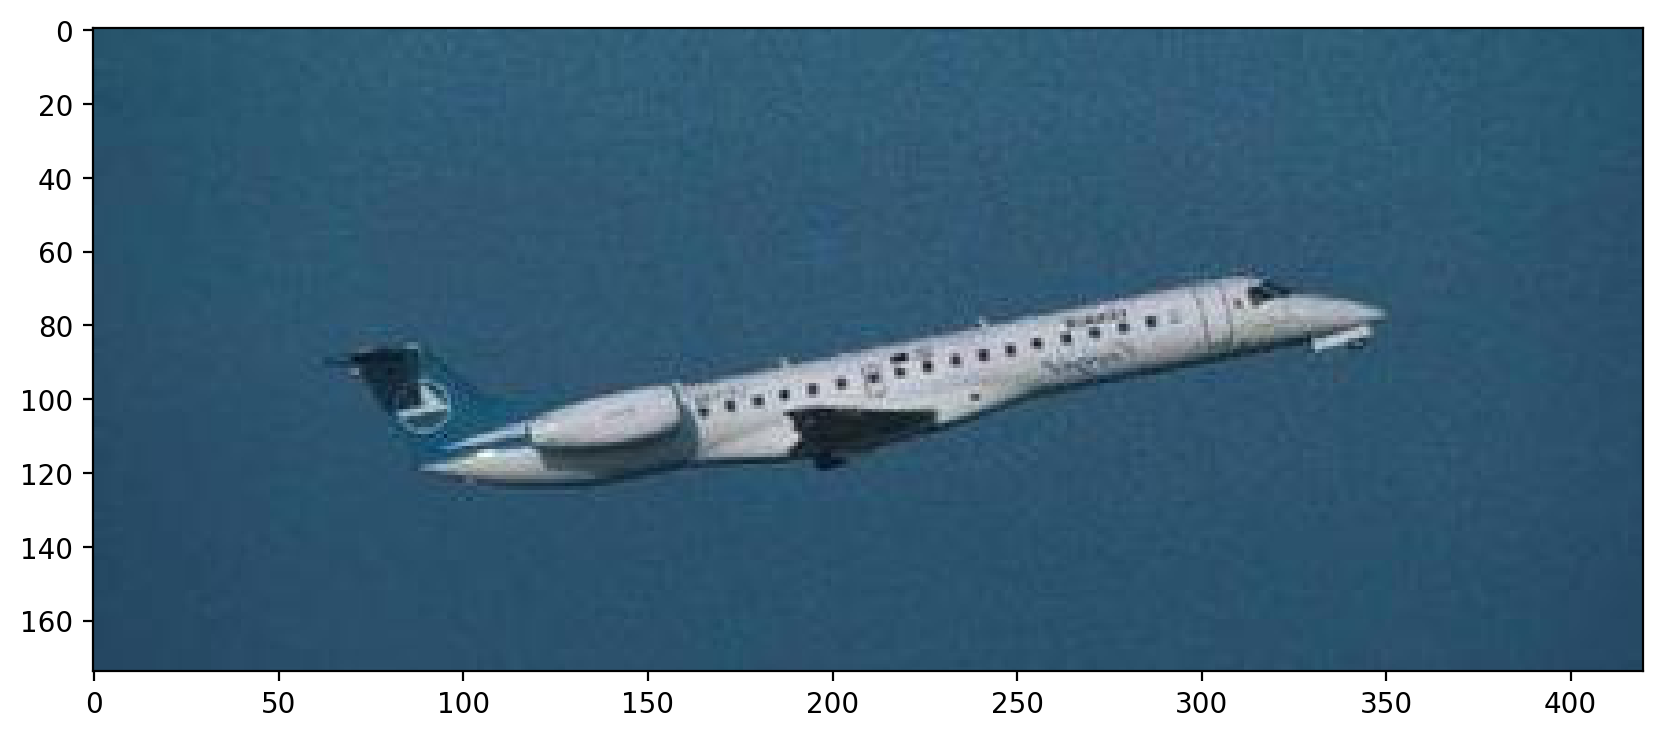

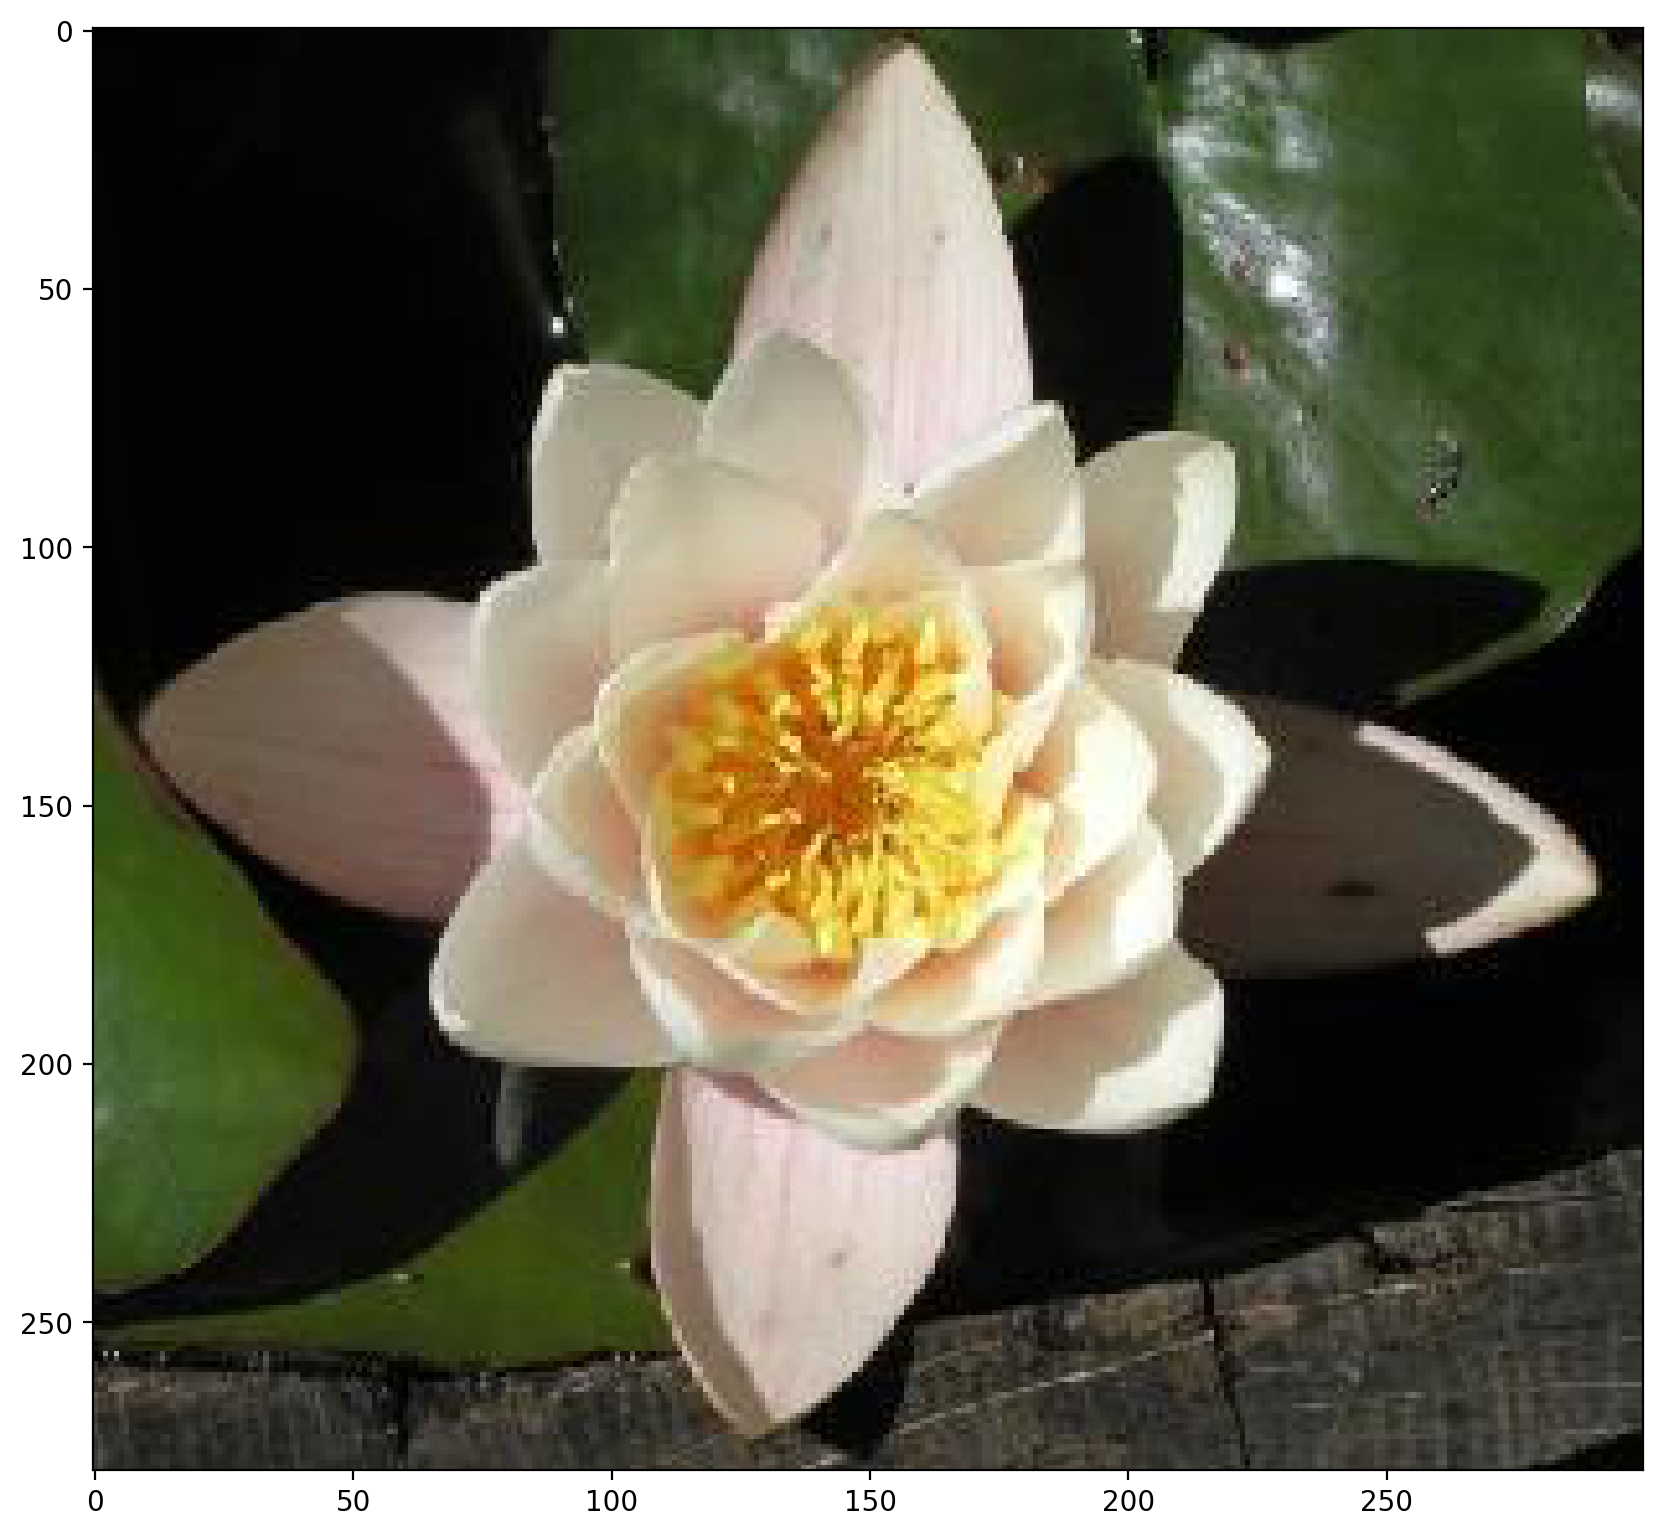

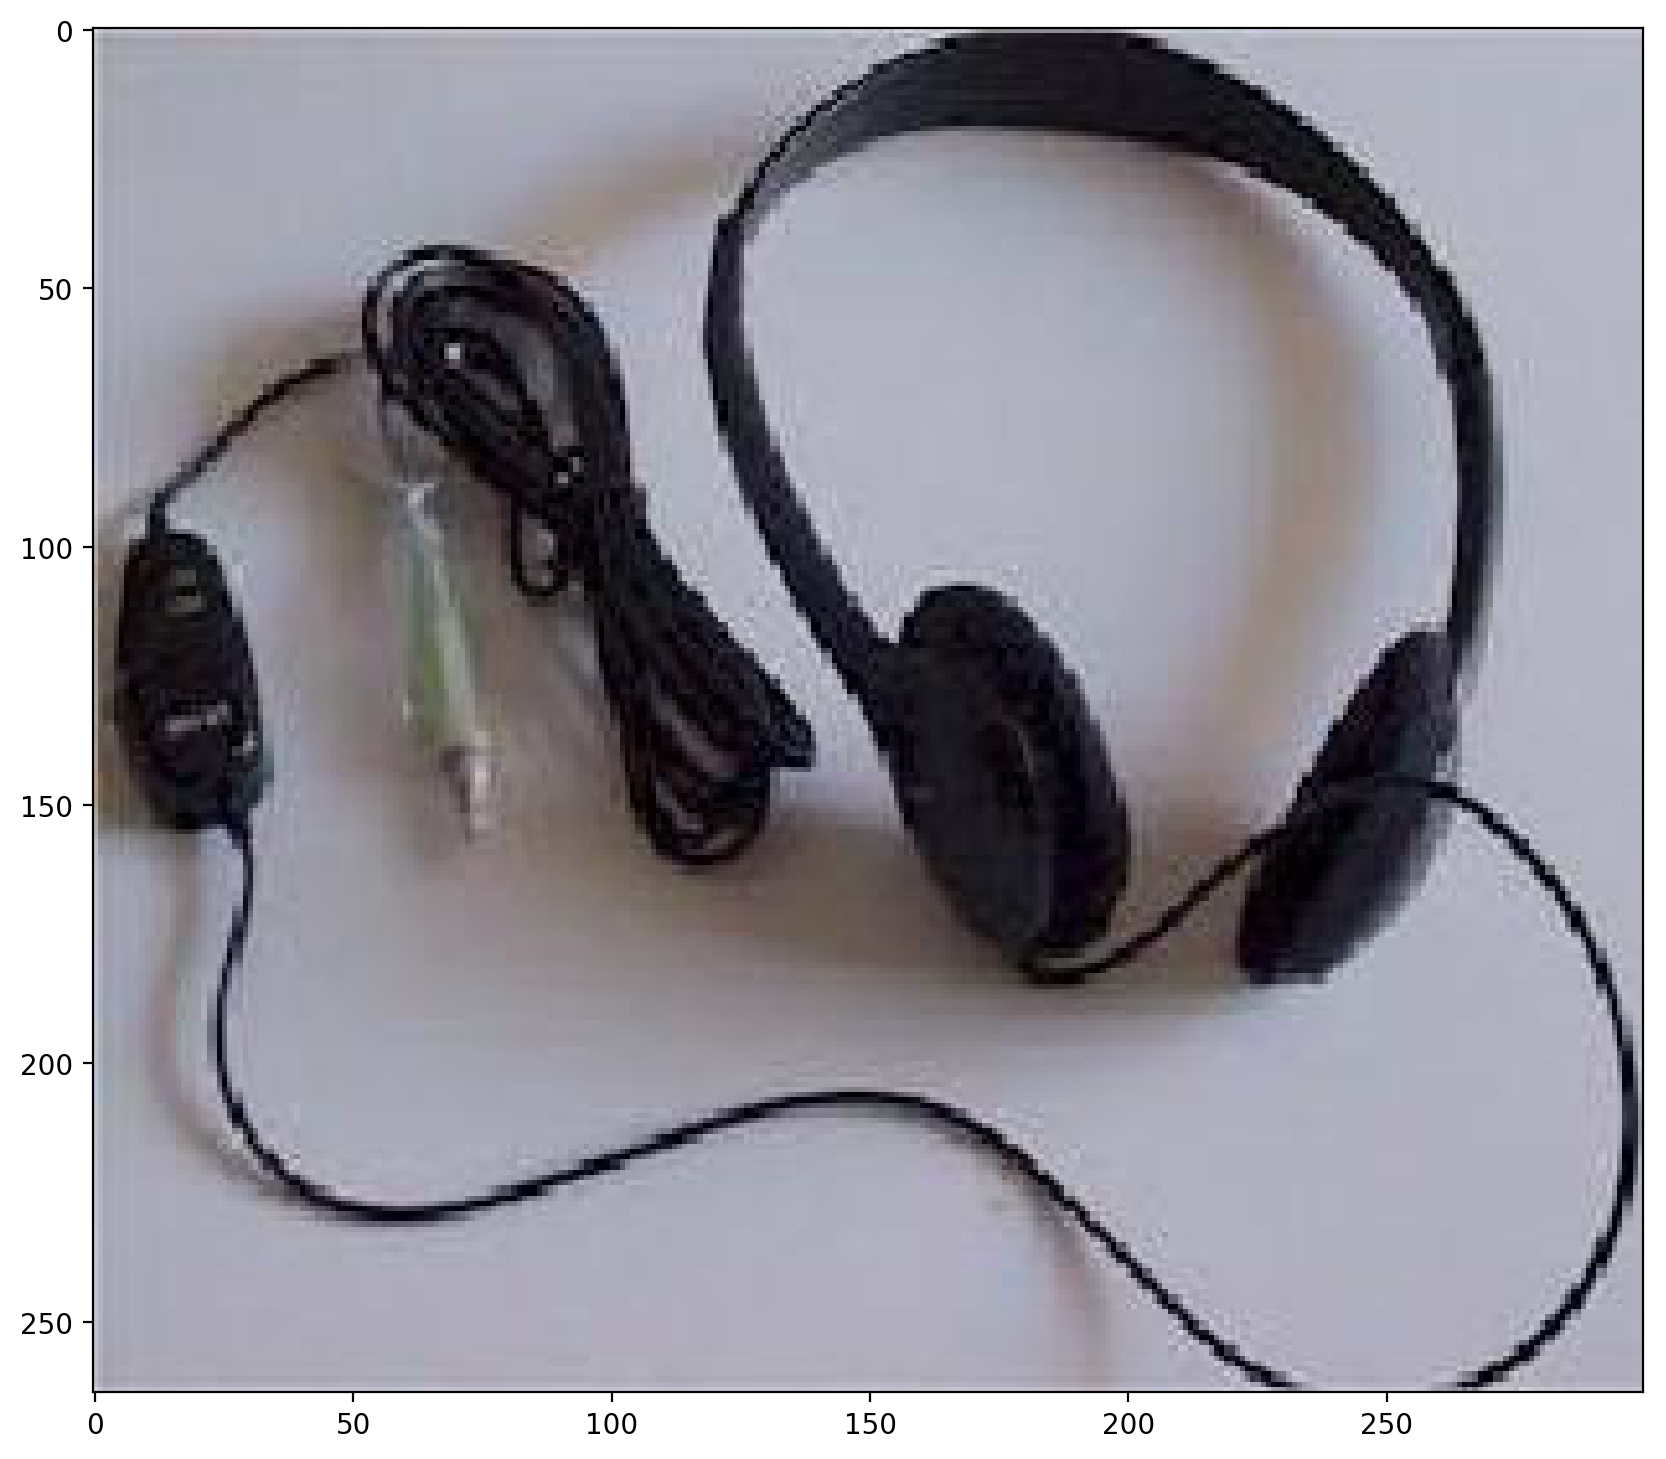

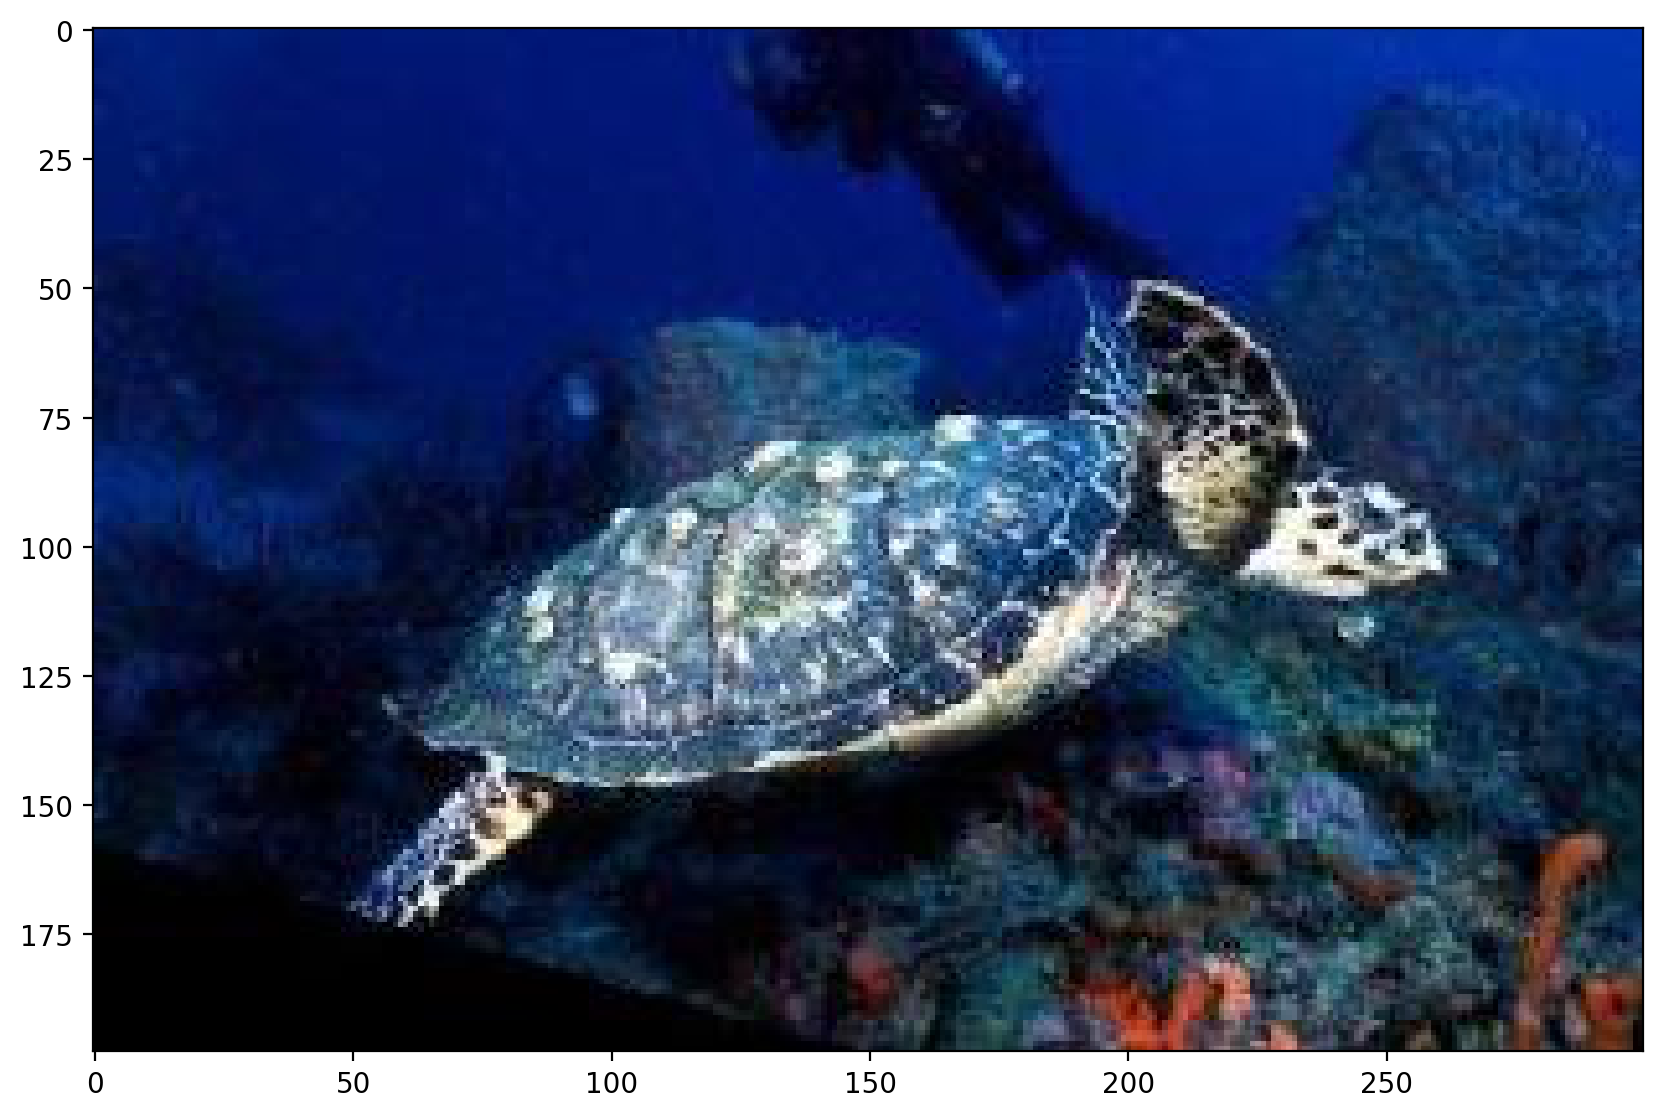

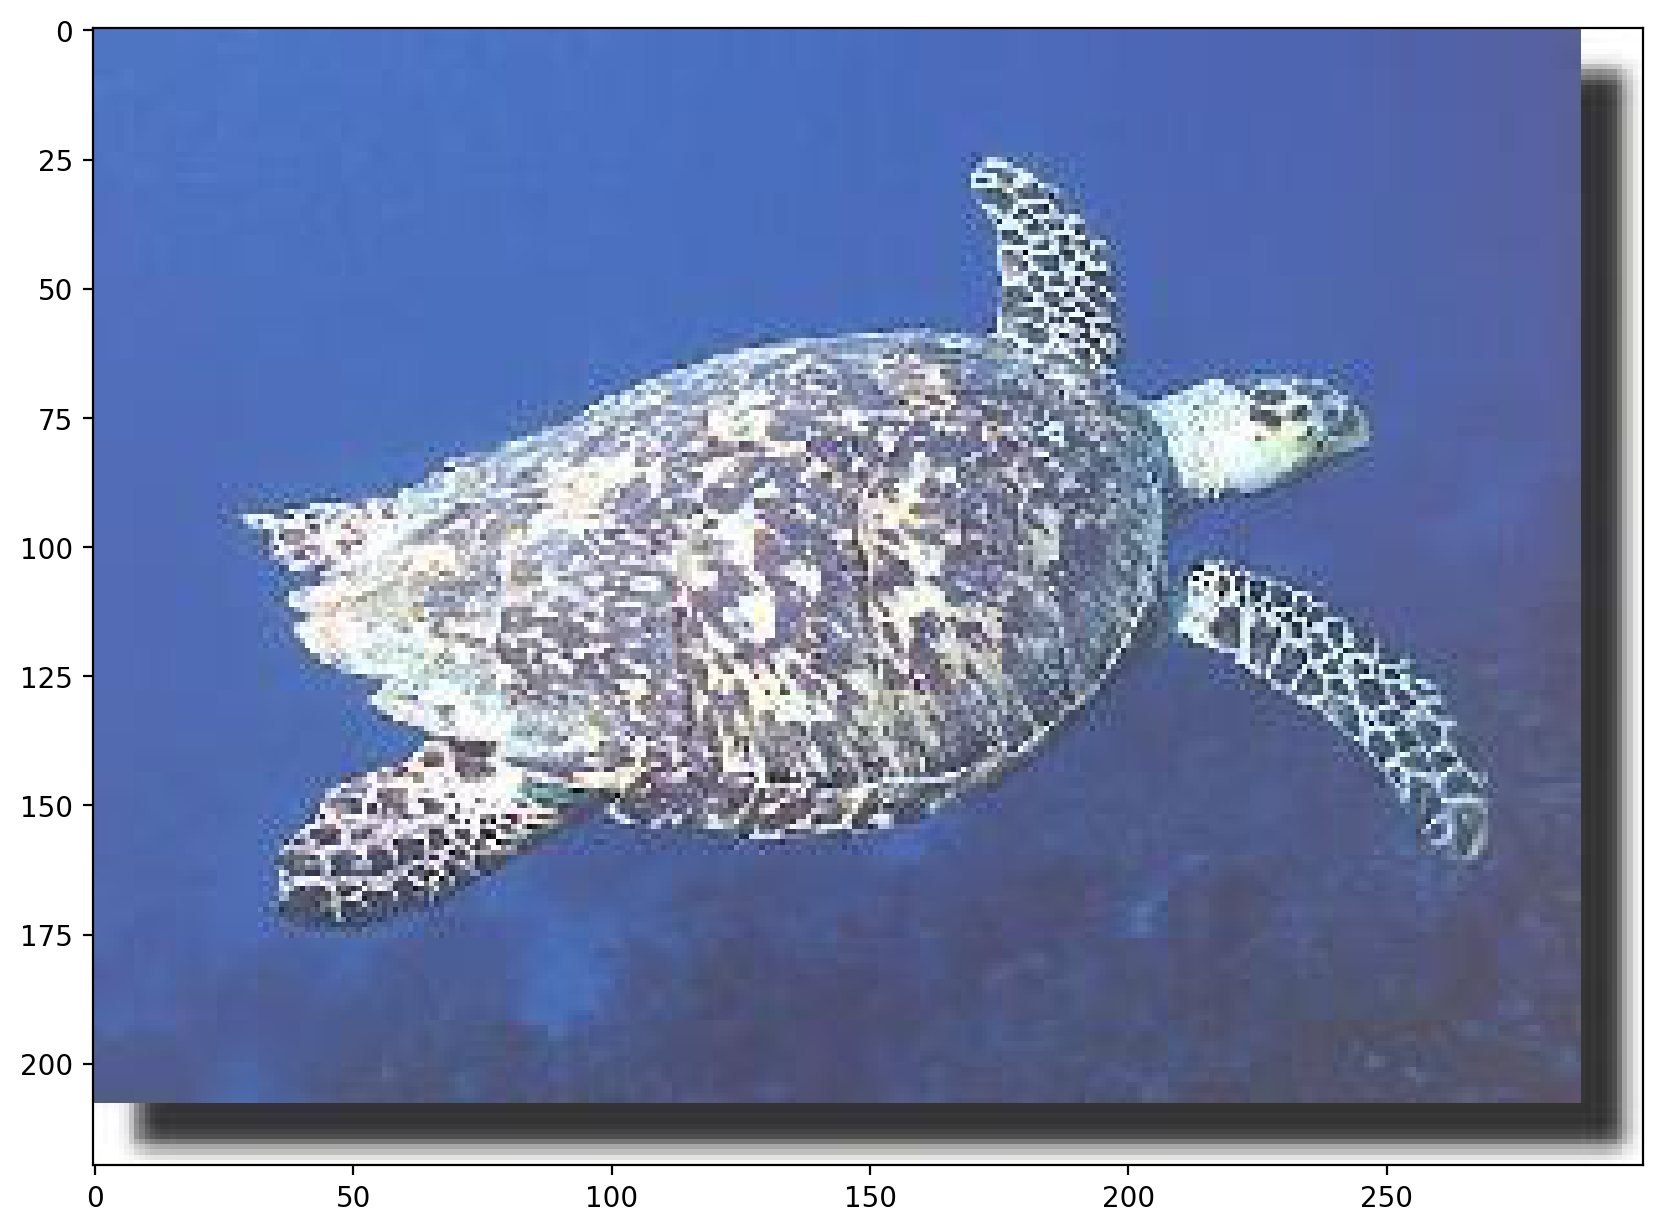

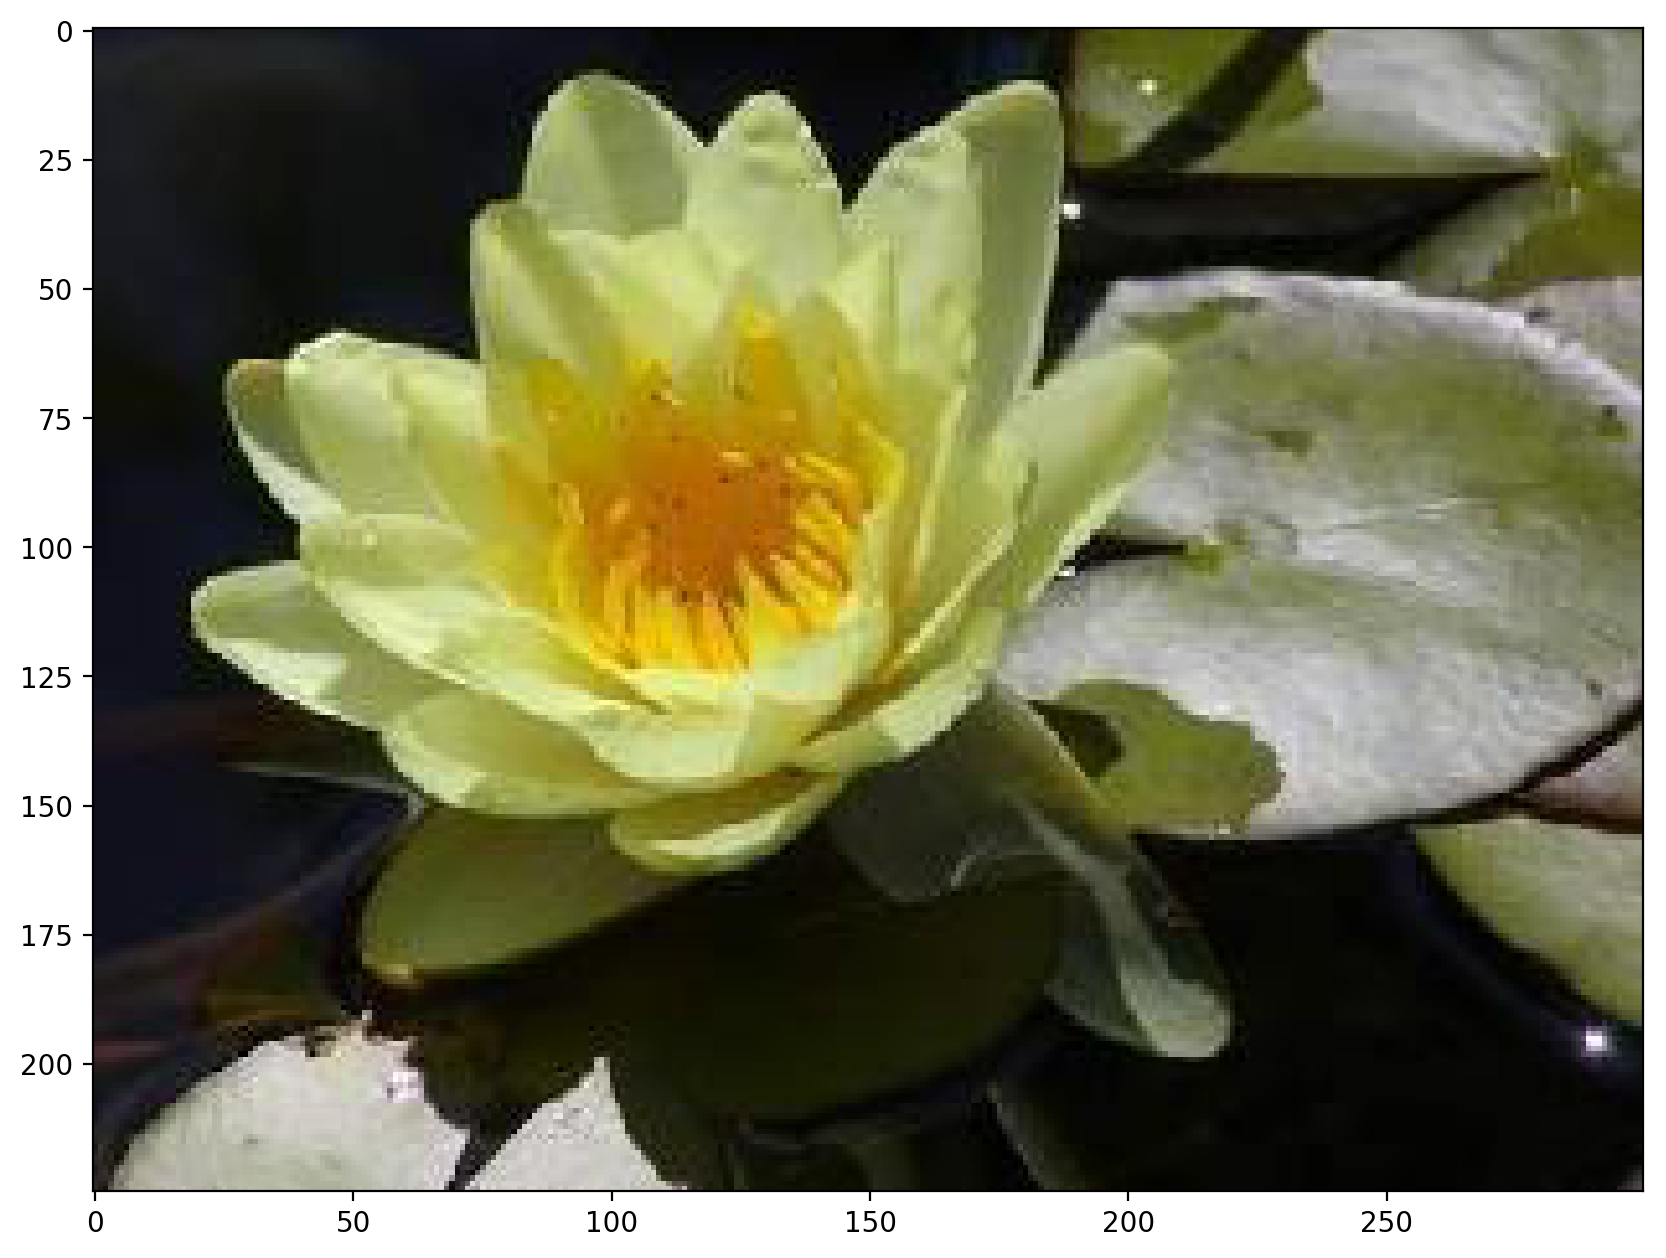

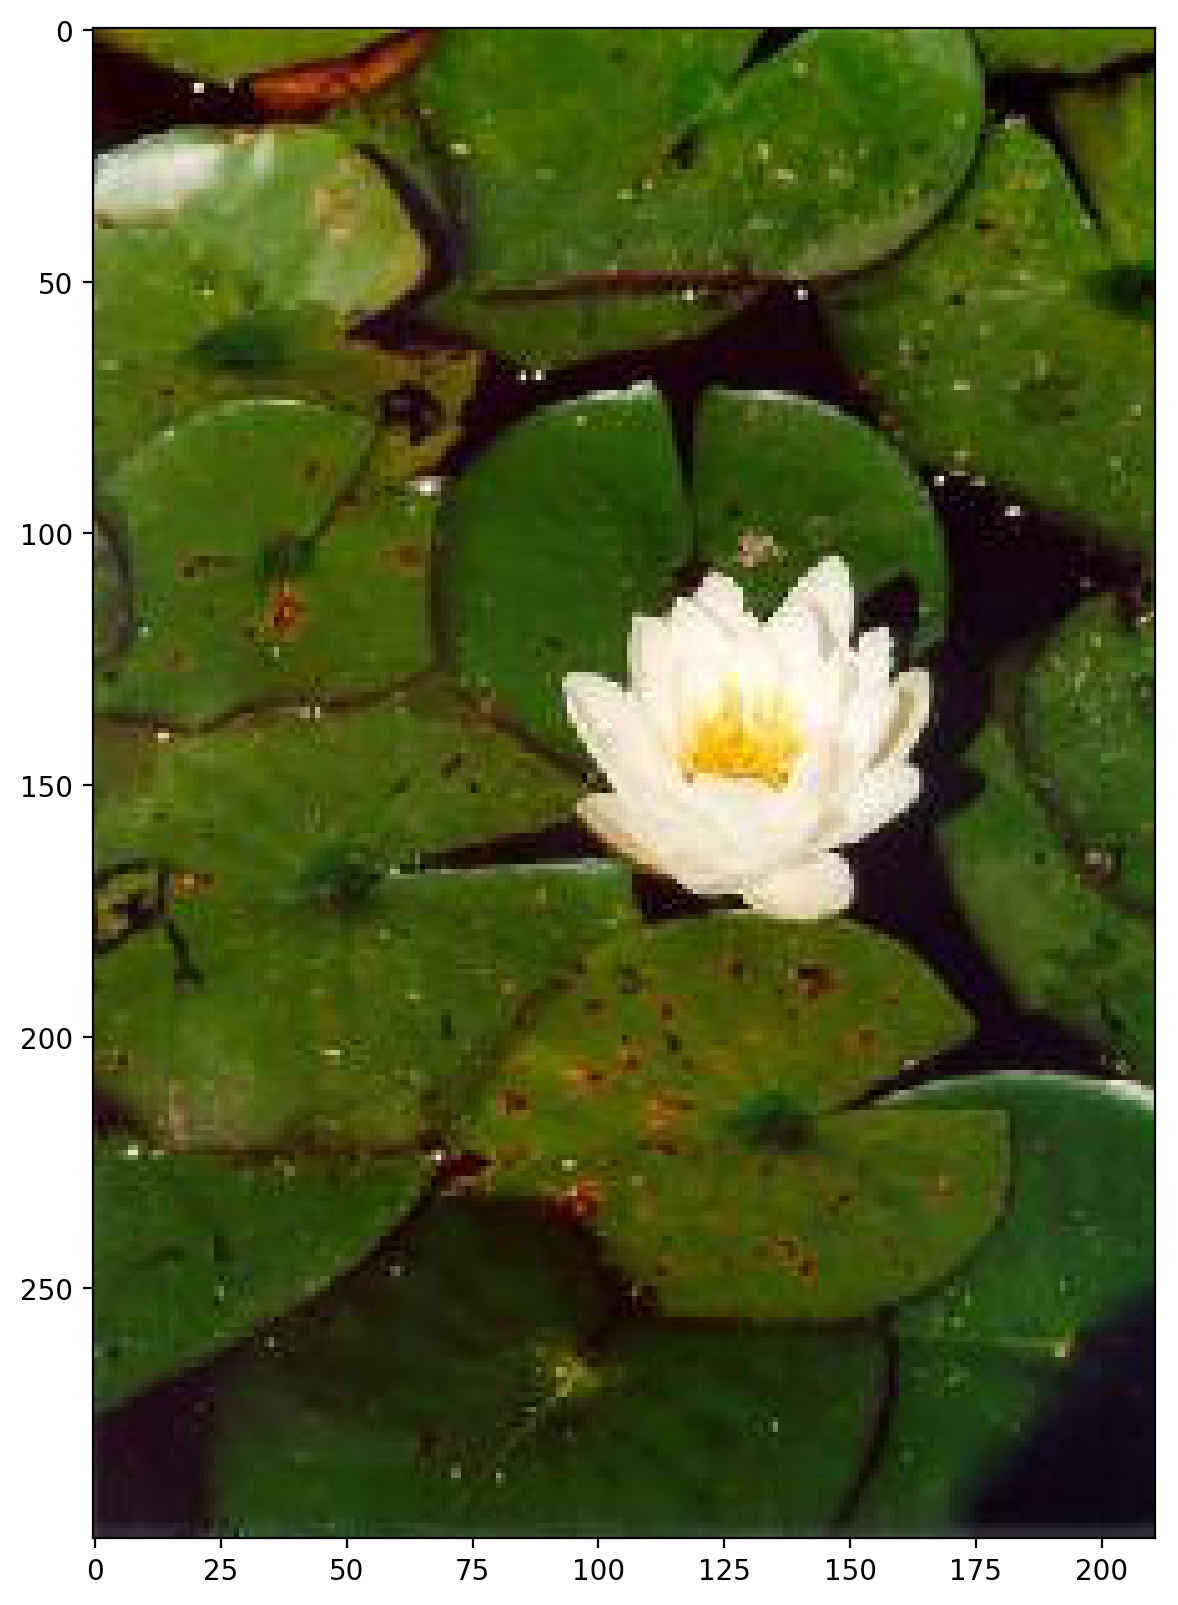

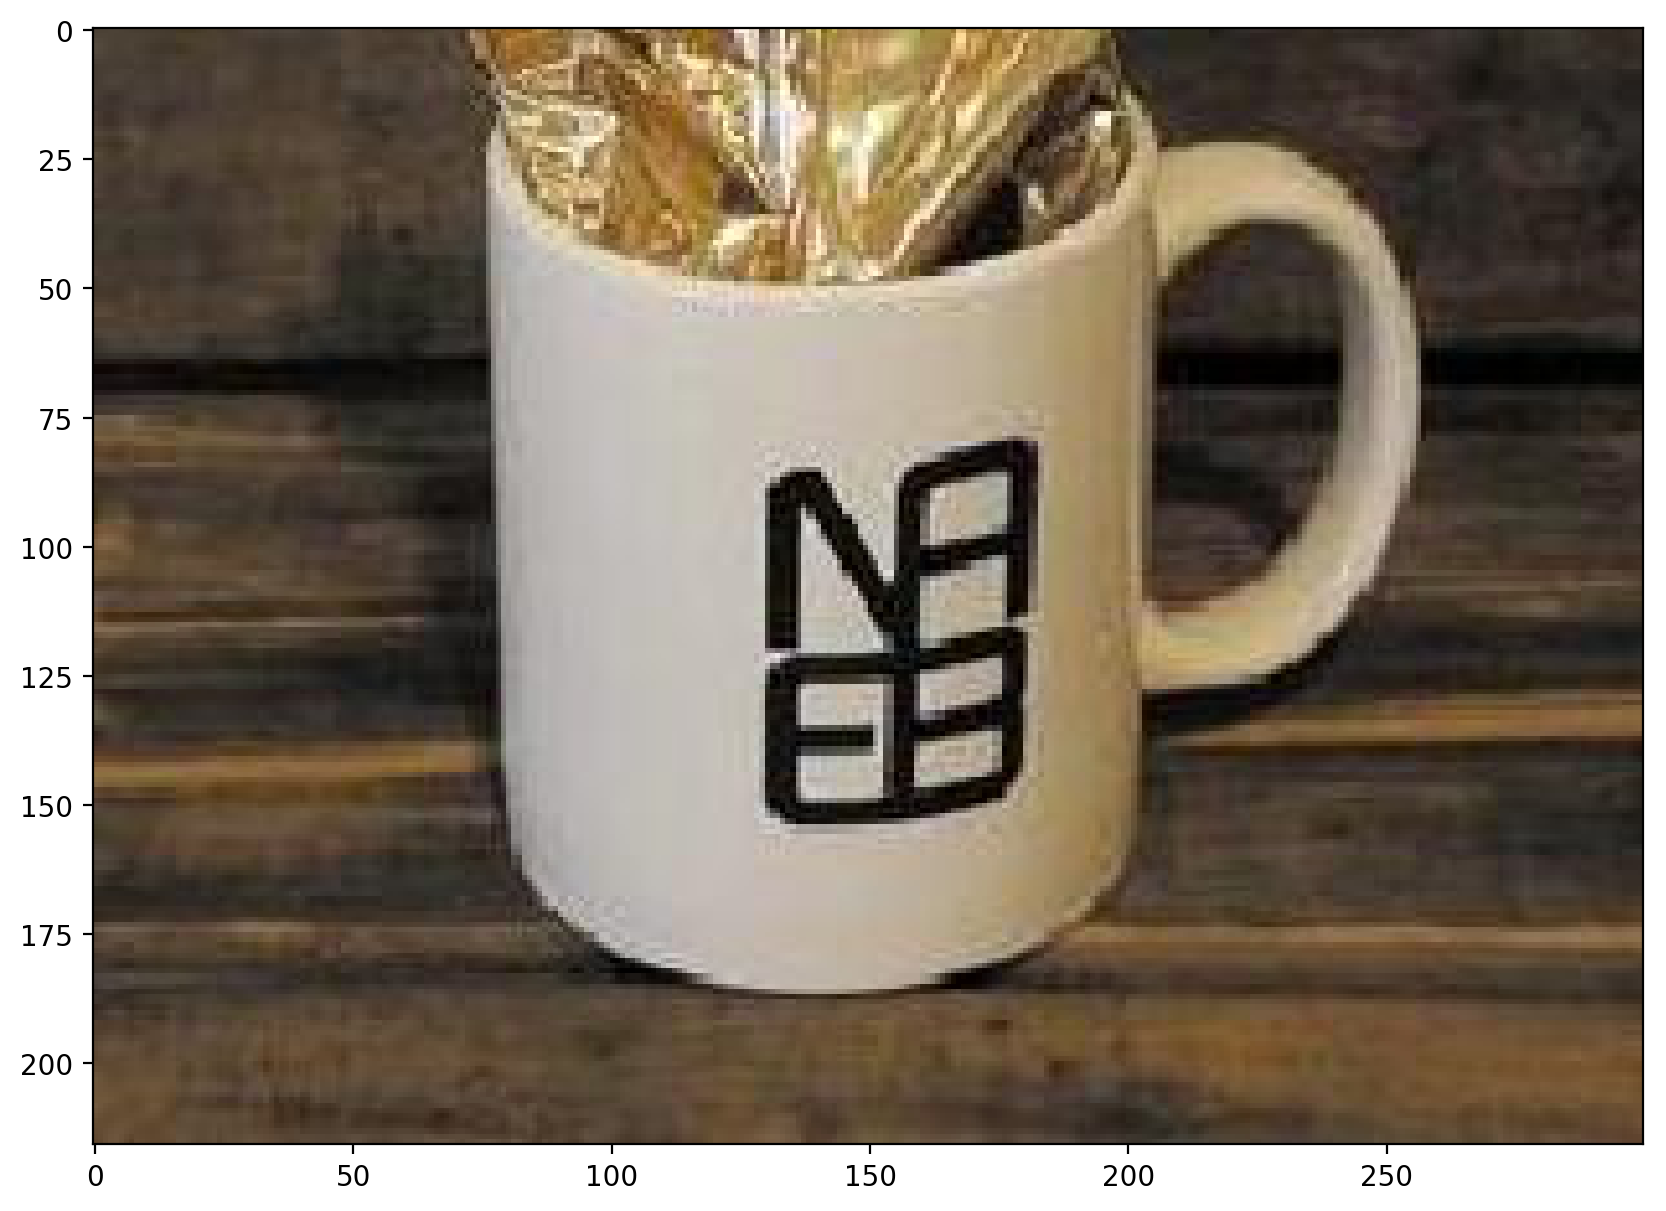

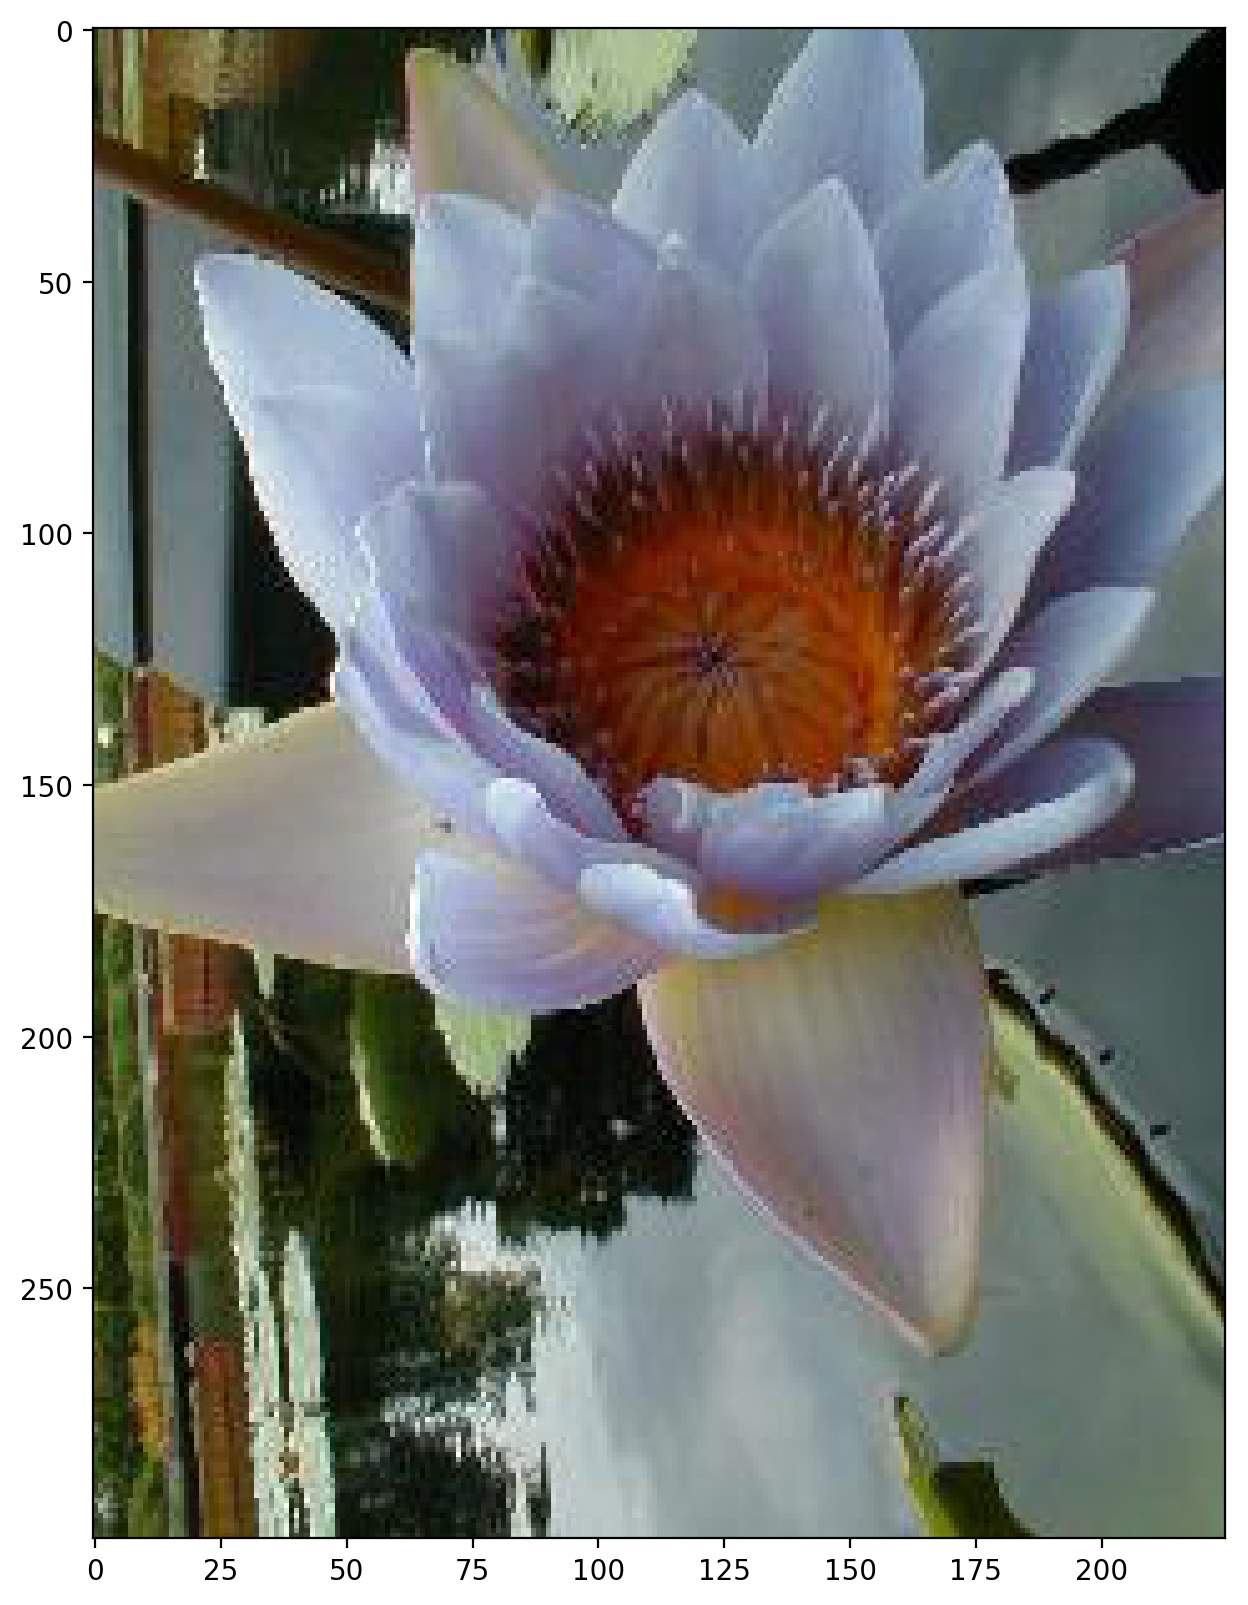

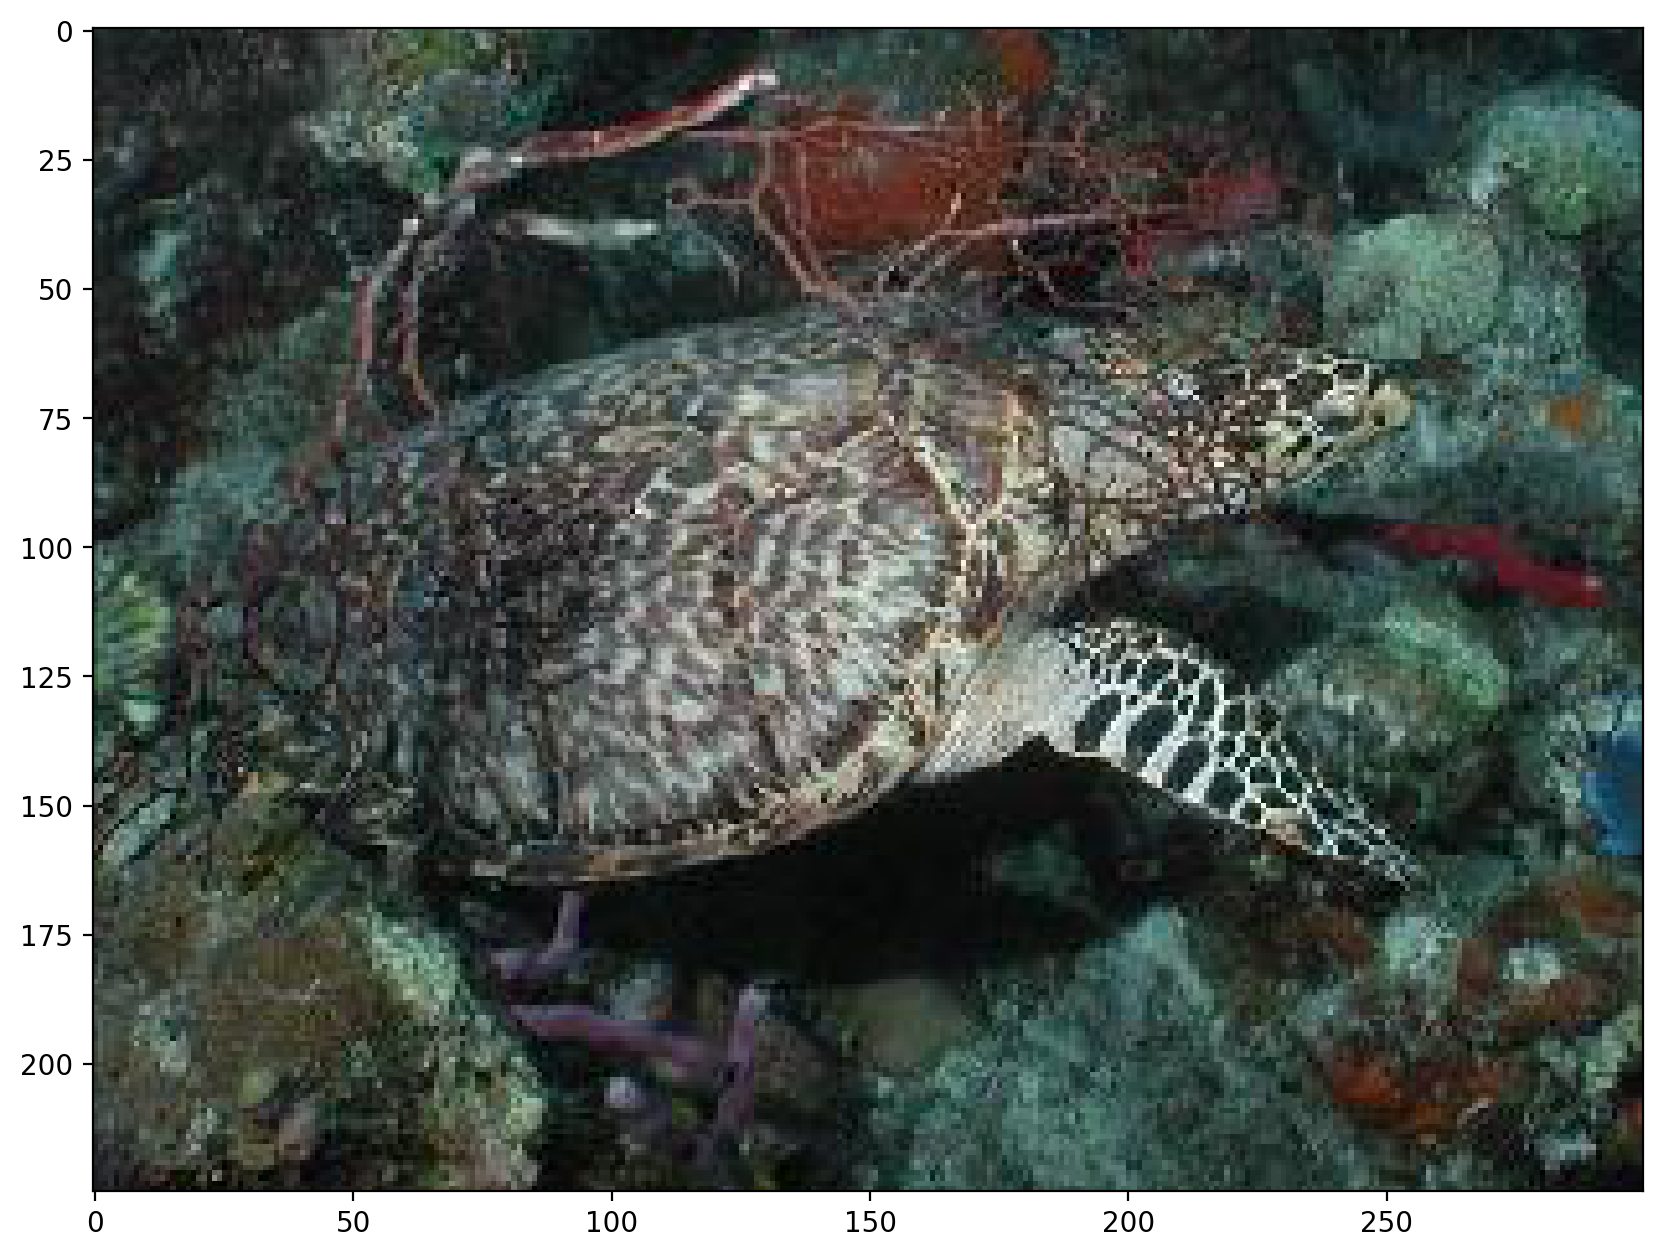

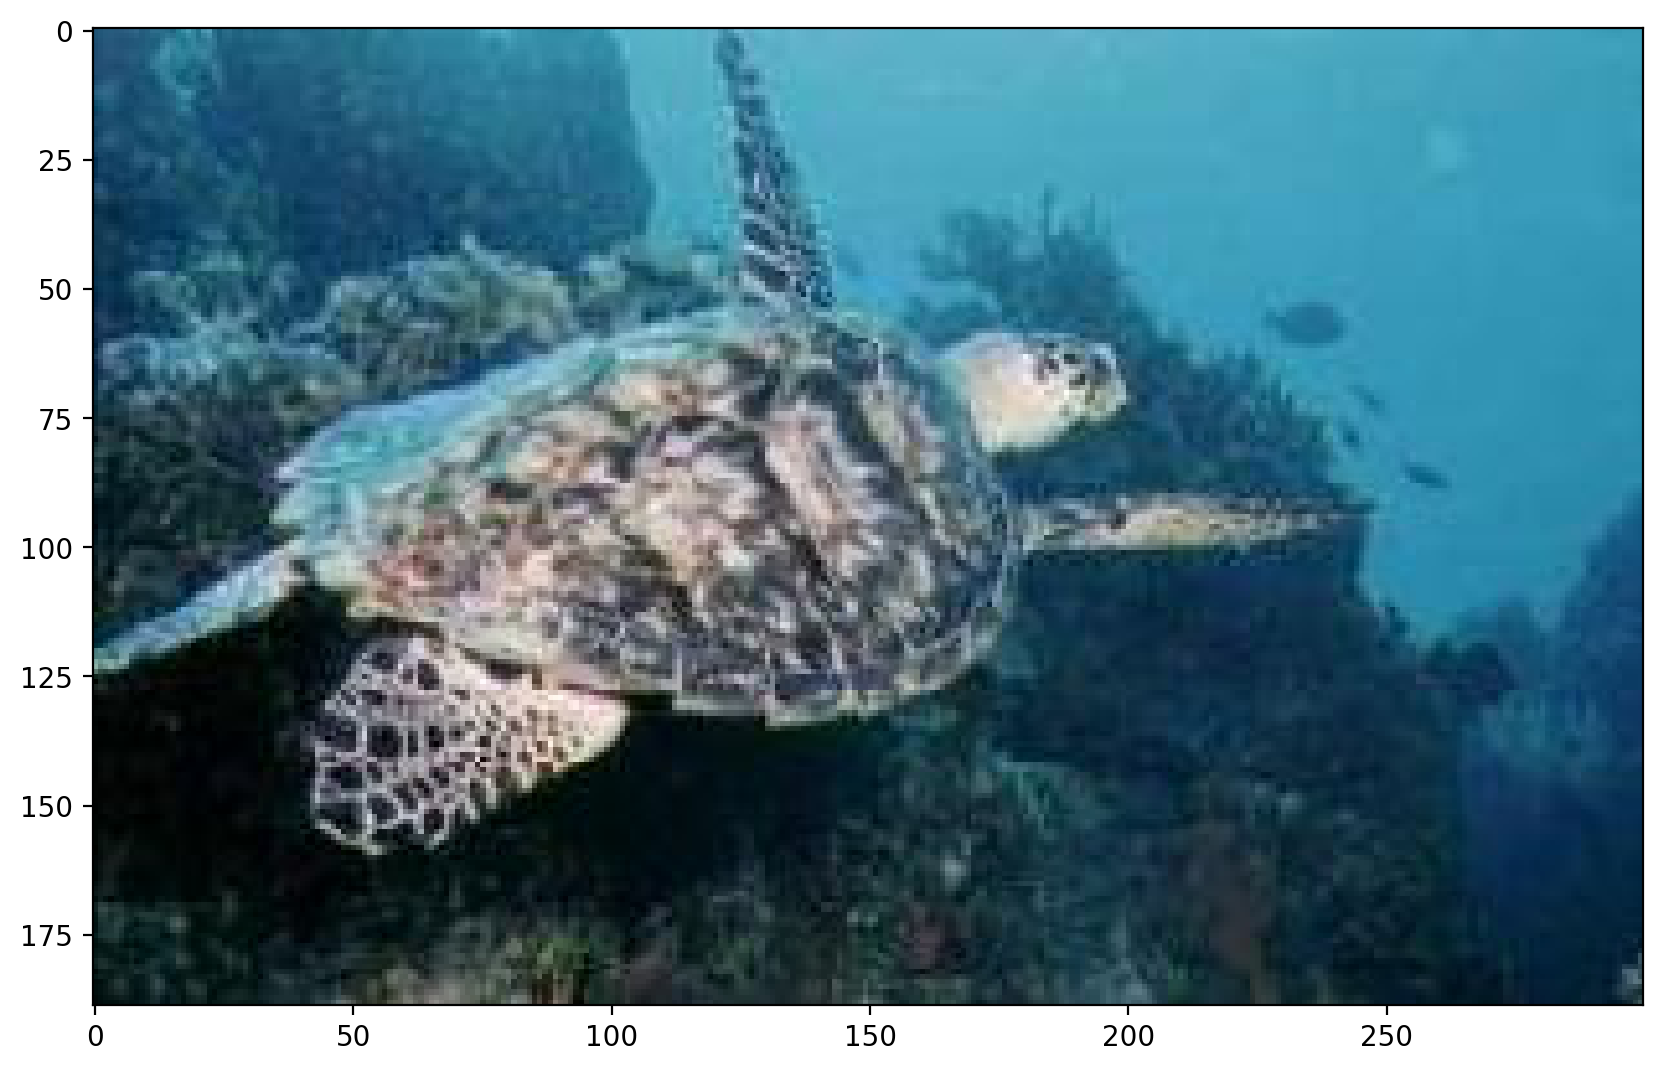

<Figure size 2000x2000 with 0 Axes>

In [29]:
# python hist_matching.py static/database/_practice/airplanes_image_0001.jpg static/database/_practice/

import cv2
from docopt import docopt
import glob
import logging
import os
import sys
from statistics import mean
from IPython.display import Image, display_png, display_jpeg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#Jupyterでインライン表示するための宣言
%matplotlib inline

if __name__ == '__main__':
    # logging config
    logging.basicConfig(
        level=logging.DEBUG,
        format='%(asctime)s %(levelname)s: %(message)s',
    )
#     logging.info('%s start.' % (__file__))

    # get parameters
    # args = docopt(__doc__)
    # target_file_path = args['--target_file_path']
    # comparing_dir_path = args['--comparing_dir_path']
#     args = sys.argv
    args = ["static/database/_practice/airplanes_image_0001.jpg", "static/database/_practice/"]
    
    target_file_path = args[0]
    comparing_dir_path = args[1]


    # setting
    img_size = (200, 200)
    channels = (0, 1, 2)
    mask = None
    hist_size = 256
    ranges = (0, 256)
    ret = {}

    # get comparing files
    pattern = '%s/*.jpg'
    comparing_files = glob.glob(pattern % (comparing_dir_path))
    if len(comparing_files) == 0:
        logging.error('no files.')
        sys.exit(1)

    # read target image
    target_file_name = os.path.basename(target_file_path)
    target_img = cv2.imread(target_file_path)
    target_img = cv2.resize(target_img, img_size)

    for comparing_file in comparing_files:
        comparing_file_name = os.path.basename(comparing_file)
        if comparing_file_name == target_file_name:
            continue

        tmp = []
        for channel in channels:
            # calc hist of target image
            target_hist = cv2.calcHist([target_img], [channel], mask, [hist_size], ranges)

            # read comparing image
            comparing_img_path = os.path.join(
                os.path.abspath(os.path.dirname(comparing_dir_path.strip("/static/database/_practice"))),
#                 os.path.abspath(os.path.dirname(__file__)),
                comparing_file,
            )
            comparing_img = cv2.imread(comparing_img_path)
            comparing_img = cv2.resize(comparing_img, img_size)
            # calc hist of comparing image
            comparing_hist = cv2.calcHist([comparing_img], [channel], mask, [hist_size], ranges)

            # compare hist
            tmp.append(cv2.compareHist(target_hist, comparing_hist, 0))

        # mean hist
        ret[comparing_file] = mean(tmp)

    # sort
    for k, v in sorted(ret.items(), reverse=True, key=lambda x: x[1]):
#         img_size2 = (20, 20)
#         k = cv2.resize(k, img_size2)
        #画像をarrayに変換
#         print(k)
#         a = Image.open(k)
        #貼り付け
        plt.imshow(np.asarray(Image.open(k)))
        fig = plt.figure(figsize=(10,10),dpi=200)
        #表示
        fig.show()
#         display_jpeg(Image(k))
#         logging.info('%s: %f.' % (k, v))
        

#     logging.info('%s end.' % (__file__))
    sys.exit(0)